# 非監督式學習
- 非監督式學習是一種機器學習的方法，它不需要標記的訓練數據。
- 在非監督式學習中，算法是給定一組數據，然後要求算法找到數據中的結構，並且可以將數據分組或分類。
- 非監督式學習的一個常見的例子是分群 (clustering)。

## 主成分分析(PCA, Principal Component Analysis)
- 一種線性降維技術，它將原始資料轉換成一組正交的新座標軸，這些新座標軸稱為主成分。正交是指這些新座標軸是相互垂直的，意味著它們之間是獨立的。
- 目標是找到一組新的座標軸，使得資料在這些座標軸上的投影具有最大的變異性。
- 在統計學和機器學習領域中廣泛用來降低資料維度、去除關聯性與雜訊。

PCA 的步驟：
1. 標準化資料。例如將資料的平均值設為 0，標準差設為 1 **(一定要標準化資料)**。
2. 計算共變異矩陣。共變異矩陣是一個對稱矩陣，它的對角線元素是各個特徵的變異值，而非對角線元素是特徵之間的共變異數。
3. 計算共變異矩陣的特徵向量和特徵值。特徵向量指的是一組向量，它們可以讓我們將資料投影到新的座標軸上。特徵值是特徵向量的重要性的度量。
4. 選擇主成分。主成分指的是特徵值最大的特徵向量。我們可以根據特徵值的大小來選擇主成分。
5. 選擇主成分後，將原始資料投影到新的座標軸上。

簡單來說，PCA 的目標是找到一組新的座標軸，使得資料在這些座標軸上的投影具有最大的變異性。這樣做的好處是可以減少資料的維度，同時保留最重要的資訊。

注意：
1. PCA 透過線性投影的方式來縮減數據特徵的維度，因此它只適用於線性可分的數據。如果數據是非線性可分的，PCA 的效果可能不好，此時可以考慮使用非線性降維技術，例如 t-SNE，或是使用核主成分分析 (Kernel PCA)，它可以將數據映射到高維空間，使得數據在高維空間中是線性可分的。
2. Component 的數量，不能超過原本的特徵數量，否則會失去解釋性。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# 可以顯示中文
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')

# 讀取資料
df = pd.read_csv('ex5.csv')
df.head(3)

,Number,Name,Type1,Type2,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,妙蛙種子,Grass,Poison,45,49,49,65,65,45,1,False
1,2,妙蛙草,Grass,Poison,60,62,63,80,80,60,1,False
2,3,妙蛙花,Grass,Poison,80,82,83,100,100,80,1,False


In [2]:
# 標準化
from sklearn.preprocessing import StandardScaler

# 欄位名稱
cols = ['HP', 'Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed']

# 標準化
scaler = StandardScaler()
scaler = scaler.fit(df[cols])

# 標準化後的欄位資料
cols_std = scaler.transform(df[cols])

# 轉換為 DataFrame
df_std = pd.DataFrame(cols_std, columns=cols)
df_std

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
0,-0.953742,-0.944182,-0.811994,-0.254699,-0.264836,-0.794112
1,-0.369098,-0.546297,-0.364800,0.198588,0.271880,-0.281597
2,0.410428,0.065835,0.274047,0.802971,0.987502,0.401757
3,0.410428,0.616753,1.551742,1.467792,1.703124,0.401757
4,-1.187600,-0.852362,-1.003648,-0.405795,-0.801553,-0.110758
...,...,...,...,...,...,...
889,-0.096264,-0.209624,-0.237031,-0.012946,-0.193274,0.162583
890,0.137594,-0.209624,-0.045377,1.618887,0.021413,1.802632
891,-0.330121,1.565557,4.362671,-0.617329,1.023283,-1.887478
892,-0.641932,1.443131,-0.684224,2.344147,0.236099,1.324285


In [3]:
# 標準化後的資料
df_std.describe()

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
count,8.940000e+02,8.940000e+02,8.940000e+02,8.940000e+02,8.940000e+02,8.940000e+02
mean,1.986976e-16,-3.973953e-17,-7.947905e-17,2.781767e-17,-9.934882e-17,1.986976e-18
std,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00,1.000560e+00
min,-2.668698e+00,-2.290872e+00,-2.217458e+00,-1.916752e+00,-1.874986e+00,-2.160820e+00
25%,-7.588604e-01,-7.605427e-01,-7.800513e-01,-7.079864e-01,-8.015527e-01,-7.941122e-01
50%,-1.352399e-01,-1.484111e-01,-1.412039e-01,-2.546993e-01,-8.593067e-02,-1.107584e-01
75%,4.104281e-01,6.167534e-01,4.976436e-01,6.518748e-01,6.296913e-01,7.434340e-01
max,7.231278e+00,3.371345e+00,4.969576e+00,3.643570e+00,5.639045e+00,3.818526e+00


In [4]:
# 進行 PCA
from sklearn.decomposition import PCA

# 指定要保留的主成分數量
num_pc = 2
pca = PCA(n_components=num_pc)

# 進行 PCA
pca = pca.fit(df_std)

# 主成分分析後的資料
df_pca = pd.DataFrame(pca.components_, columns=cols)

# 主成分分析後的資料
li_index = []
for i in range(num_pc):
    li_index.append('PC' + str(i+1))
df_pca.index = li_index

# 預覽結果
'''
PCA 後，每個欄位的值，代表該欄位在主成分中的權重，
數值越大代表該欄位在主成分中的影響越大，反之則越小。

例如 PC2 中，
Speed 的權重最大，代表 Speed 在 PC2 中的影響最大，
Defense 的權重最小，代表 Defense 在 PC2 中的影響最小。

Speed 大，而 Defense 小，
代表 PC2 可能是一個速度相對較快，但防禦相對較弱的主成分，
換言成，就是一個速度型的寶可夢 (以犧牲防禦來強化速度)。
PC2 的值愈高，代表該寶可夢愈符合這個特性。
'''
df_pca

,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
PC1,0.393787,0.443033,0.369369,0.457304,0.445262,0.323783
PC2,-0.039396,0.034400,-0.619764,0.293366,-0.275120,0.671865


#### 依據資料分佈的狀況，得到兩個主成分

NameError: name 'np' is not defined

d:\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  func(*args, **kwargs)
d:\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


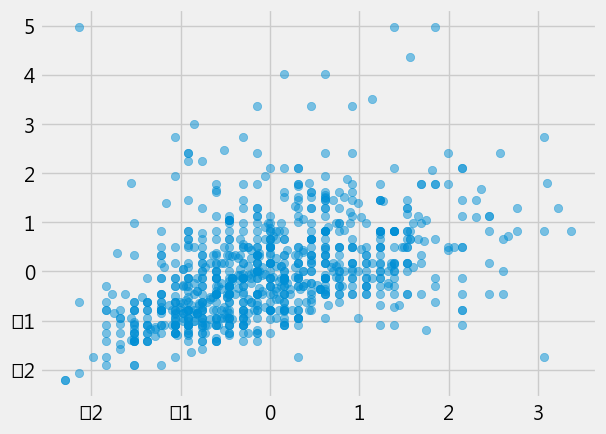

In [5]:
# 設定箭頭參數
arrow_props = dict(
    arrowstyle='->', 
    linewidth=2, 
    color='k'
)

# 繪製 gca (get current axis) 的散佈圖
def draw_arrow(v0, v1):
    plt.gca().annotate(
        '', 
        xy=v1, 
        xytext=v0, 
        arrowprops=arrow_props
    )

# 繪製散佈圖
plt.scatter(
    df_std['Attack'], 
    df_std['Defense'], 
    alpha=0.5
)

# 以箭頭顯示 PC1 與 PC2
for len_, vec in zip(pca.explained_variance_[:2], pca.components_[:2]):
    # 將 Attack 和 Defense 的 vector 乘上 3 倍的標準差
    v = vec[1:3] * 3 * np.sqrt(len_)
    
    # 以 Attack 和 Defense 的平均值為起點，畫出箭頭
    draw_arrow(pca.mean_[1:3], pca.mean_[1:3] + v)


plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

d:\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  func(*args, **kwargs)
d:\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


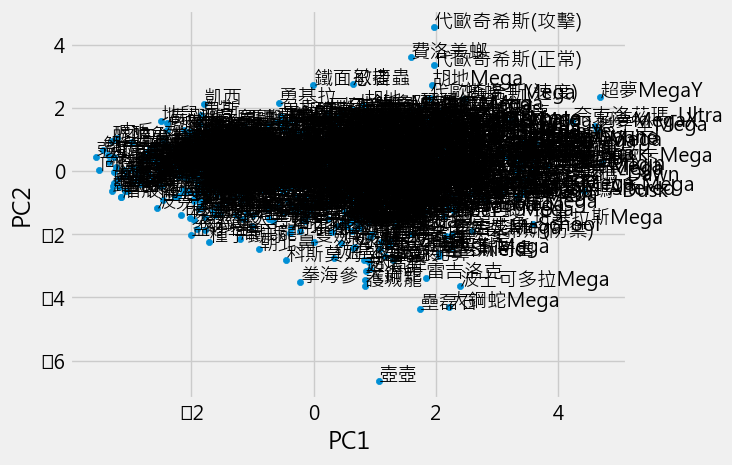

In [ ]:
# 將標準化之後的資料轉換為 dataframe
pc_scores = pd.DataFrame(pca.transform(df_std))

# 設定欄位名稱
li_columns = []
for i in range(num_pc):
    li_columns.append('PC' + str(i+1))
pc_scores.columns = li_columns

# 預覽結果
pc_scores.plot(
    kind='scatter', 
    x='PC1', 
    y='PC2'
)
# pc_scores.head(3)

# 顯示每個樣本的名稱
for i, txt in enumerate(df['Name']):
    plt.annotate(txt, (pc_scores['PC1'][i], pc_scores['PC2'][i]))

#### 解釋變異數 (PCA 的解釋力)

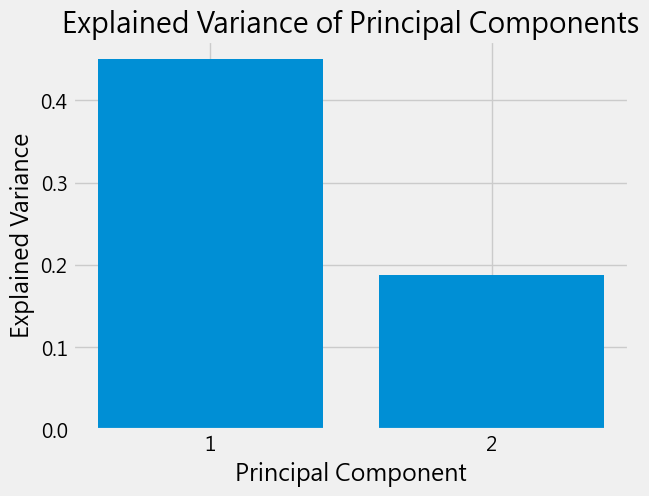

In [6]:
# 對 PCA 的解釋力
explained_variance = pca.explained_variance_ratio_
'''
explained_variance
array([0.44971934, 0.18724019])

這裡的 explained_variance 指的是每個主成分解釋的變異量，
可以看到第一個主成分解釋了 0.4x 的變異量，第二個主成分解釋了 0.1x 的變異量，
PC1 計算了每個欄位的加權平均，PC2 計算了每個欄位的加權平均。
加權平均的算法，是將每個欄位的平均值 (要先算好) 乘上 df_pca 的值，然後相加。

至於解釋力要選擇幾個主成分，可以參考解釋力的累積值，
通常會選擇累積值超過 0.8 的主成分數量。
如果要選擇 2 個主成分，那麼解釋力就是 0.4x + 0.1x = 0.6x，解釋了 60% 左右的變異量。

降維後，每個欄位的重要性，可以看 df_pca 的值，值越大代表重要性越高。
'''

# 繪製圖表
fig, ax = plt.subplots()
ax.bar(range(1, num_pc + 1), explained_variance)
ax.set_xlabel('Principal Component')
ax.set_xticks(range(1, num_pc + 1))
ax.set_ylabel('Explained Variance')
ax.set_title('Explained Variance of Principal Components')
plt.show()

[2.70133767 1.12469922 0.78692388 0.71251463]
[0.44971934 0.18724019 0.13100727 0.11861961]
[0.44971934 0.63695953 0.76796681 0.88658641]


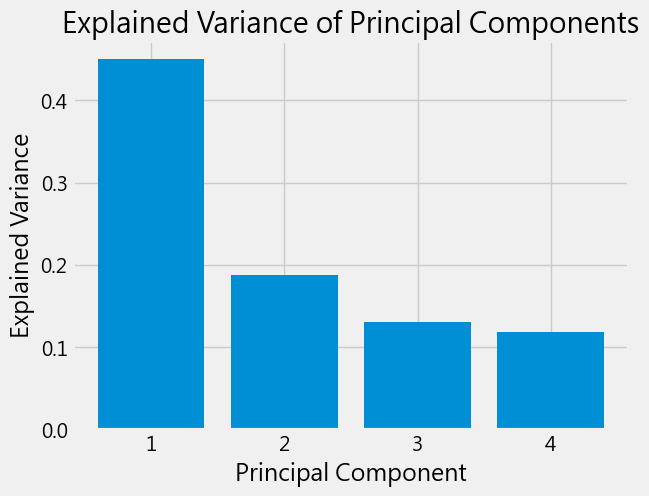

In [7]:
# 指定要保留的主成分數量
num_pc = 4
pca = PCA(n_components=num_pc)

# 進行 PCA
pca = pca.fit(df_std)

# 特徵值 (eigenvalues)
print(pca.explained_variance_)

# 解釋變異比例
print(pca.explained_variance_ratio_)

# 解釋變異比例的累積值
print(pca.explained_variance_ratio_.cumsum())

# 繪製圖表
fig, ax = plt.subplots()
ax.bar(range(1, num_pc + 1), pca.explained_variance_ratio_)
ax.set_xlabel('Principal Component')
ax.set_xticks(range(1, num_pc + 1))
ax.set_ylabel('Explained Variance')
ax.set_title('Explained Variance of Principal Components')
plt.show()

In [8]:
# 解釋 80% 的變異
pca = PCA(n_components=0.8)
pca = pca.fit(df_std)

# 特徵值 (指的是各個主成分的變異數)
print(pca.explained_variance_) 

# 解釋變異比例 (各個主成分的變異比例)
print(pca.explained_variance_ratio_)

# 將主成分分析後的資料轉換為 DataFrame
df_pca = pd.DataFrame(pca.components_, columns=cols)

# 主成分分析後的資料
li_index = []
for i in range(pca.n_components_):
    li_index.append('PC' + str(i+1))
df_pca.index = li_index

# 預覽結果
df_pca

[2.70133767 1.12469922 0.78692388 0.71251463]
[0.44971934 0.18724019 0.13100727 0.11861961]


,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
PC1,0.393787,0.443033,0.369369,0.457304,0.445262,0.323783
PC2,-0.039396,0.034400,-0.619764,0.293366,-0.275120,0.671865
PC3,0.485325,0.578250,-0.033621,-0.332590,-0.552728,-0.113274
PC4,0.710255,-0.415154,-0.406510,0.168762,0.176726,-0.313404


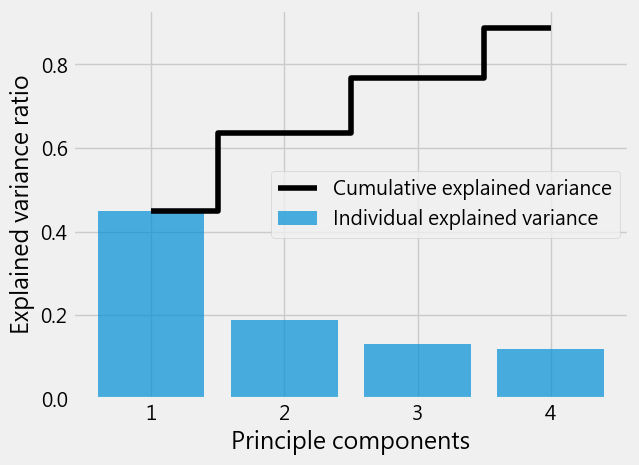

In [9]:
import numpy as np

# 將每一個成份的解釋變異比例存入陣列
var = np.array(pca.explained_variance_ratio_)
'''
array([0.44971934, 0.18724019, 0.13100727, 0.11861961])
'''

# 累積解釋變異比例 (將解釋變異比例進行累加)
cum_var = np.cumsum(var)

# 繪製圖表
plt.bar(
    range(1, len(var)+1), 
    var, 
    alpha=0.7, 
    align='center',
    label='Individual explained variance'
)

# 繪製累積解釋變異比例
plt.step(
    range(1, len(cum_var)+1), 
    cum_var, 
    where='mid', 
    color='k',
    label='Cumulative explained variance'
)
plt.xticks(range(1, len(var)+1))

plt.ylabel('Explained variance ratio')
plt.xlabel('Principle components')
plt.legend()
plt.show()

#### PCA 的熱圖
- PCA 的熱力圖，可以看到每個欄位在主成分中的權重，數值越大代表該欄位在主成分中的影響越大，反之則越小。
- 例如 PC2 在 Defense 的權重最小，代表 Defense 在 PC2 中的影響最小，但是 Speed 在 PC2 中的權重最大，代表 Speed 在 PC2 中的影響最大。代表原始的資料中，Speed 的影響最大，Defense 的影響最小。

d:\anaconda3\envs\ml\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.draw()
d:\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


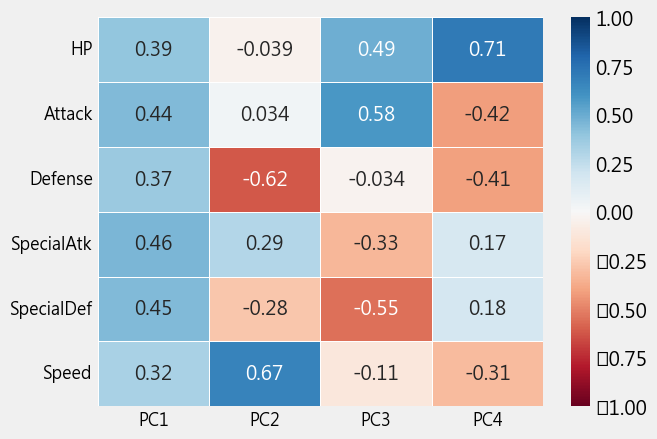

In [10]:
import seaborn as sns

# 繪製熱圖
ax = sns.heatmap(
    df_pca.transpose(), # 轉置
    center=0, 
    linewidths=0.5, 
    cmap="RdBu", 
    vmin=-1, 
    vmax=1, 
    annot=True
)

# 設定 xticks 的字型大小
ax.set_xticklabels(
    ax.xaxis.get_majorticklabels(), 
    fontsize=12
)

# 設定 yticks 的字型大小
ax.set_yticklabels(
    ax.yaxis.get_majorticklabels(), 
    fontsize=12
)

plt.show()

#### KPCA (Kernel PCA)
- 是一種非線性降維技術，它可以將數據映射到高維空間，使得數據在高維空間中是線性可分的。
- 主要思想是將數據映射到高維空間，使得數據在高維空間中是線性可分的，然後再進行 PCA。
- 重要參數是 kernel，它可以是線性核 (linear kernel)、多項式核 (polynomial kernel)、RBF 核 (Radial Basis Function kernel) 等。
- 缺點是計算量大，因為它需要計算數據在高維空間中的內積。
- 優點是可以處理非線性可分的數據。

d:\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


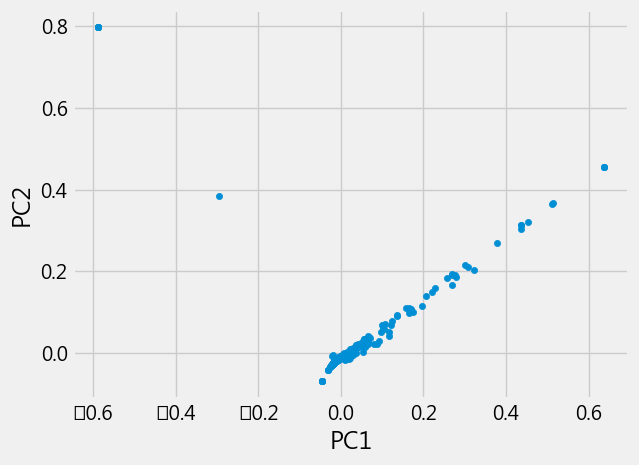

In [11]:
# 進行 KPCA (rbf)
from sklearn.decomposition import KernelPCA

# 指定要保留的主成分數量
num_pc = 2

# 初始化 KPCA
kpca = KernelPCA(
    n_components=num_pc, 
    kernel='rbf', 
    gamma=5
)

# 對標準化後的資料進行 KPCA
X_kpca = kpca.fit_transform(df_std)

# 將 KPCA 的結果轉換為 DataFrame
pc_scores = pd.DataFrame(X_kpca)

# 設定欄位名稱
list_cols = []
for i in range(num_pc):
    list_cols.append('PC' + str(i+1))
pc_scores.columns = list_cols

# 預覽結果
pc_scores.plot(
    kind='scatter', 
    x='PC1', 
    y='PC2'
)

plt.show()

## 分群 (Clustering)

用途：為非監督式學習，主要用於分群，將資料分成不同的群，每個群內的資料相似度高，不同群之間的資料相似度低。是資料探勘中一個重要的技術。

用語不同，有時候會稱為「分群」，有時候會稱為「聚類」。

### K-means 分群

步驟：
1. 隨機選擇 K 個質心 (centroid)。
2. 計算每個資料點到 K 個質心的距離，將資料點分到最近的質心。
3. 更新質心位置。
4. 重複步驟 2, 3 直到質心位置不再變動。

影響分群結果的因素：
1. K 值的選擇。
2. 質心的初始化方法。
3. 距離的計算方法。

優點：
1. 速度快。
2. 容易解釋。

缺點：
1. 容易受到極端值的影響。
2. 僅適用於數值型的資料。
3. 樣本數不平衡時，分群結果可能不佳。

參考資料：
- [[機器學習首部曲] 聚類分析 K-Means / K-Medoids](https://pyecontech.com/2020/05/19/k-means_k-medoids/)

In [12]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 讀取資料
df = pd.read_csv('ex5.csv')

# 指定兩個屬性
t1, t2 = 'Bug', 'Psychic'

# 過濾出兩個屬性
df_clf = df[ (df['Type1'] == t1) | (df['Type1'] == t2) ]

# 對寶可夢兩個屬性的 SpecialAtk, SpecialDef 進行分群
df_clf = df_clf[['Type1', 'SpecialAtk', 'SpecialDef']]

# 重新設定索引
df_clf.reset_index(inplace=True)

# 過濾出兩個屬性
idx_0 = [df_clf['Type1']==t1] # Bug 的索引
idx_1 = [df_clf['Type1']==t2] # Psychic 的索引

# 僅留下 SpecialAtk 和 SpecialDef 的 dataframe  
X = df_clf[['SpecialAtk', 'SpecialDef']]

# 標準化
scaler = StandardScaler()
scaler = scaler.fit(X)
X_std = scaler.transform(X)

# 只取得兩筆標準化後的資料
print(X_std[:2, :])

[[-1.39076263 -1.66670756]
 [-1.26781386 -1.51507461]]


d:\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


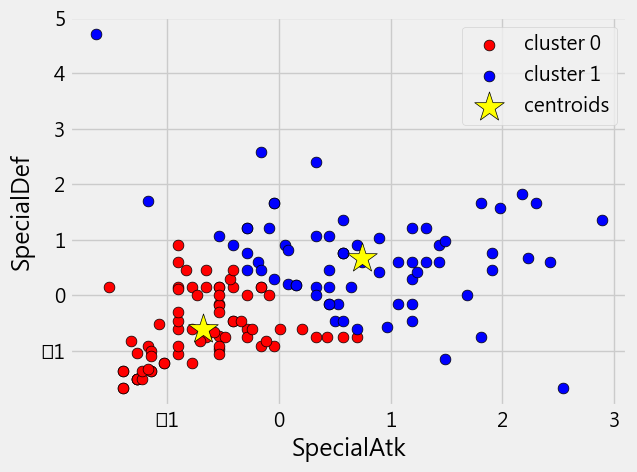

In [13]:
from sklearn.cluster import KMeans

# 初始化 KMeans，分成 2 群，init 指的是初始的中心點
km = KMeans(
    n_clusters=2, 
    init='random', # 還可以選擇 'k-means++'，可以加速收斂，主要是避免初始中心點過於集中
    random_state=0
)

# 進行分群 (X_std 是標準化 SpecialAtk 和 SpecialDef 後的資料)
y_pred = km.fit_predict(X_std)
'''
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int32)
'''

def plt_scatter(X_std, y_pred, km):
    # 設定顏色
    c1, c2 = 'red', 'blue'
    
    # 繪製第 1 群的點
    plt.scatter(
        X_std[y_pred==0, 0], # 預測為第 1 群的 SpecialAtk
        X_std[y_pred==0, 1], # 預測為第 1 群的 SpecialDef
        color=c1, # 設定顏色
        edgecolor='k', # 邊緣顏色
        s=60, # 點的大小
        label='cluster 0' # 標籤
    )
    
    # 繪製第 2 群的點
    plt.scatter(
        X_std[y_pred==1, 0], # 預測為第 2 群的 SpecialAtk
        X_std[y_pred==1, 1], # 預測為第 2 群的 SpecialDef
        color=c2, # 設定顏色
        edgecolor='k', # 邊緣顏色
        s=60, # 點的大小
        label='cluster 1' # 標籤
    )
    
    # # 嘗試找出分群錯誤的點 (在這裡把顏色顛倒過來)
    # if len(X_std[y_pred==0]) < len(X_std[y_pred==1]):
    #     c1, c2 = 'blue', 'red'
    
    # # 繪製分群錯誤的點
    # plt.scatter(
    #     X_std[idx_0[0], 0], # Bug 的 SpecialAtk 資料
    #     X_std[idx_0[0], 1], # Bug 的 SpecialDef 資料
    #     color=c1, # 設定顏色
    #     marker='^', # 設定標記
    #     alpha=0.5, # 透明度
    #     s=20, # 點的大小
    #     label=t1 # 標籤
    # )
    
    # # 繪製分群錯誤的點
    # plt.scatter(
    #     X_std[idx_1[0], 0], # Psychic 的 SpecialAtk 資料
    #     X_std[idx_1[0], 1], # Psychic 的 SpecialDef 資料
    #     color=c2, # 設定顏色
    #     marker='X', # 設定標記
    #     alpha=.5, # 透明度
    #     s=20, # 點的大小
    #     label=t2 # 標籤
    # )

    # 繪製各群的中心點 (centroids) (註: km.cluster_centers_ 是 KMeans 的中心點)
    plt.scatter(
        km.cluster_centers_[:, 0], 
        km.cluster_centers_[:, 1], 
        s=500, 
        marker='*', 
        c='yellow', 
        edgecolor='black', 
        label='centroids'
    )
    
    plt.xlabel('SpecialAtk')
    plt.ylabel('SpecialDef')
    plt.legend()
    plt.show()

# 繪製分群結果
plt_scatter(X_std, y_pred, km)

說明：
- 上圖針對寶可夢的兩個屬性進行 k-means 分群，並將結果繪製成散點圖。
- 因為已經知道是兩個屬性的分群，所以設定 k=2 (n_clusters=2)。
- 圖中藍色與紅色圈圈顯示兩個分群的結果，且進一步以藍色三角形標示 Bug 屬性，以紅色叉叉標示 Psychic 屬性。
- 換言之，只要圈圈的顏色有異常，即代表分群錯誤。

### 評估分群結果

In [14]:
# 對寶可夢兩個屬性的 SpecialAtk, SpecialDef 進行分群
li_type = ['Fairy', 'Fighting', 'Steel', 'Ice']

# 從原始資料中先過濾出 Fairy，另外建立 dataframe
df_clf = df[df['Type1']==li_type[0]]

# 加入 Fighting, Steel, Ice 資料
for t in li_type[1:]:
    df_clf = pd.concat([df_clf, df[df['Type1'] == t]])

# 選擇 SpecialAtk 和 SpecialDef 作為分群的依據
X = df_clf[['SpecialAtk', 'SpecialDef']]

# 標準化
scaler = StandardScaler()
scaler = scaler.fit(X)

# 標準化後的資料
X_std = scaler.transform(X)

# 檢視資料筆數與欄位數
X.shape

(102, 2)

#### 計算 Distortion
- 使用 k-means 演算法時，我們可以計算每個資料點到其所屬群的質心的距離平方和 (Sum of Squared Errors, SSE)，稱為 Distortion。Distortion 越小代表分群效果越好。

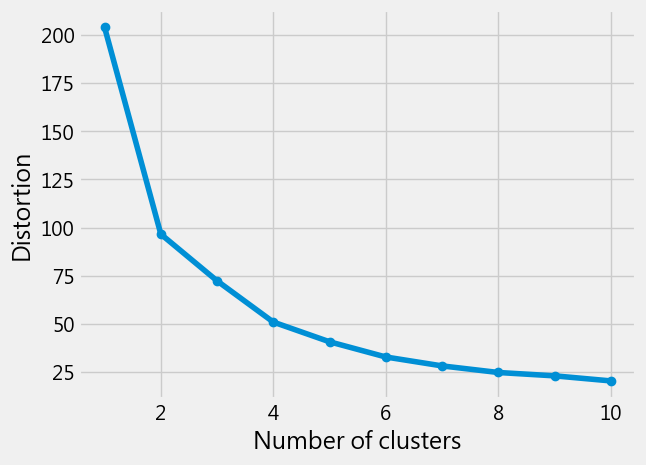

In [15]:
# 記錄每一個 k 值的 SSE
li_distortion = []

# 嘗試 10 個 k 值並記錄分群結果的 SSE
for k in range(1, 11):
    # 初始化 KMeans
    km = KMeans(
        n_clusters=k, # 
        init='random', # 隨機選擇初始中心點
        random_state=0 # 設定隨機種子
    )

    # 進行分群
    km.fit(X_std)

    # 計算 SSE (Sum of Squared Errors): 記錄每一個樣本點到最近的中心點的距離平方和
    li_distortion.append(km.inertia_)
    '''
    distortion 指的是每一個樣本點到最近的中心點的距離平方和 (SSS, Sum of Squared Errors)，
    值愈小代表分群效果愈好，反之，值愈大代表分群效果愈差。

    要如何決定 k 值呢？可以透過 distortion 來判斷，
    當 distortion 開始變化的幅度變小時，就是適合的 k 值。
    '''

# 繪製圖表
plt.plot(
    range(1, 11), 
    li_distortion, 
    marker='o'
)

plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [16]:
# 手動設定顏色
colors = [
    '#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#8B00FF',
    '#333333', '#666666', '#999999', '#CCCCCC', '#FF6666', '#FFCC66', '#FFFF66'
]

#### Silhouette Score
- Silhouette Score 是一種用來評估分群效果的指標，介於 -1 到 1 之間。
- Silhouette Score 越接近 1 代表分群效果越好，越接近 -1 代表分群效果越差。

參考連結：
- [輪廓 (聚類)](https://zh.wikipedia.org/zh-tw/轮廓_(聚类))

n_clusters = 2
所有樣本的輪廓係數 (平均值) = 0.48203536275839154
n_clusters = 3
所有樣本的輪廓係數 (平均值) = 0.3604304439287462
n_clusters = 4
所有樣本的輪廓係數 (平均值) = 0.3917905617415923
n_clusters = 5
所有樣本的輪廓係數 (平均值) = 0.4151486095275474
n_clusters = 6
所有樣本的輪廓係數 (平均值) = 0.4072358521611305
n_clusters = 7
所有樣本的輪廓係數 (平均值) = 0.35525783684653556
n_clusters = 8
所有樣本的輪廓係數 (平均值) = 0.3460587368934433
n_clusters = 9
所有樣本的輪廓係數 (平均值) = 0.3506650550425135
n_clusters = 10
所有樣本的輪廓係數 (平均值) = 0.34966169422620813


d:\anaconda3\envs\ml\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  func(*args, **kwargs)
d:\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


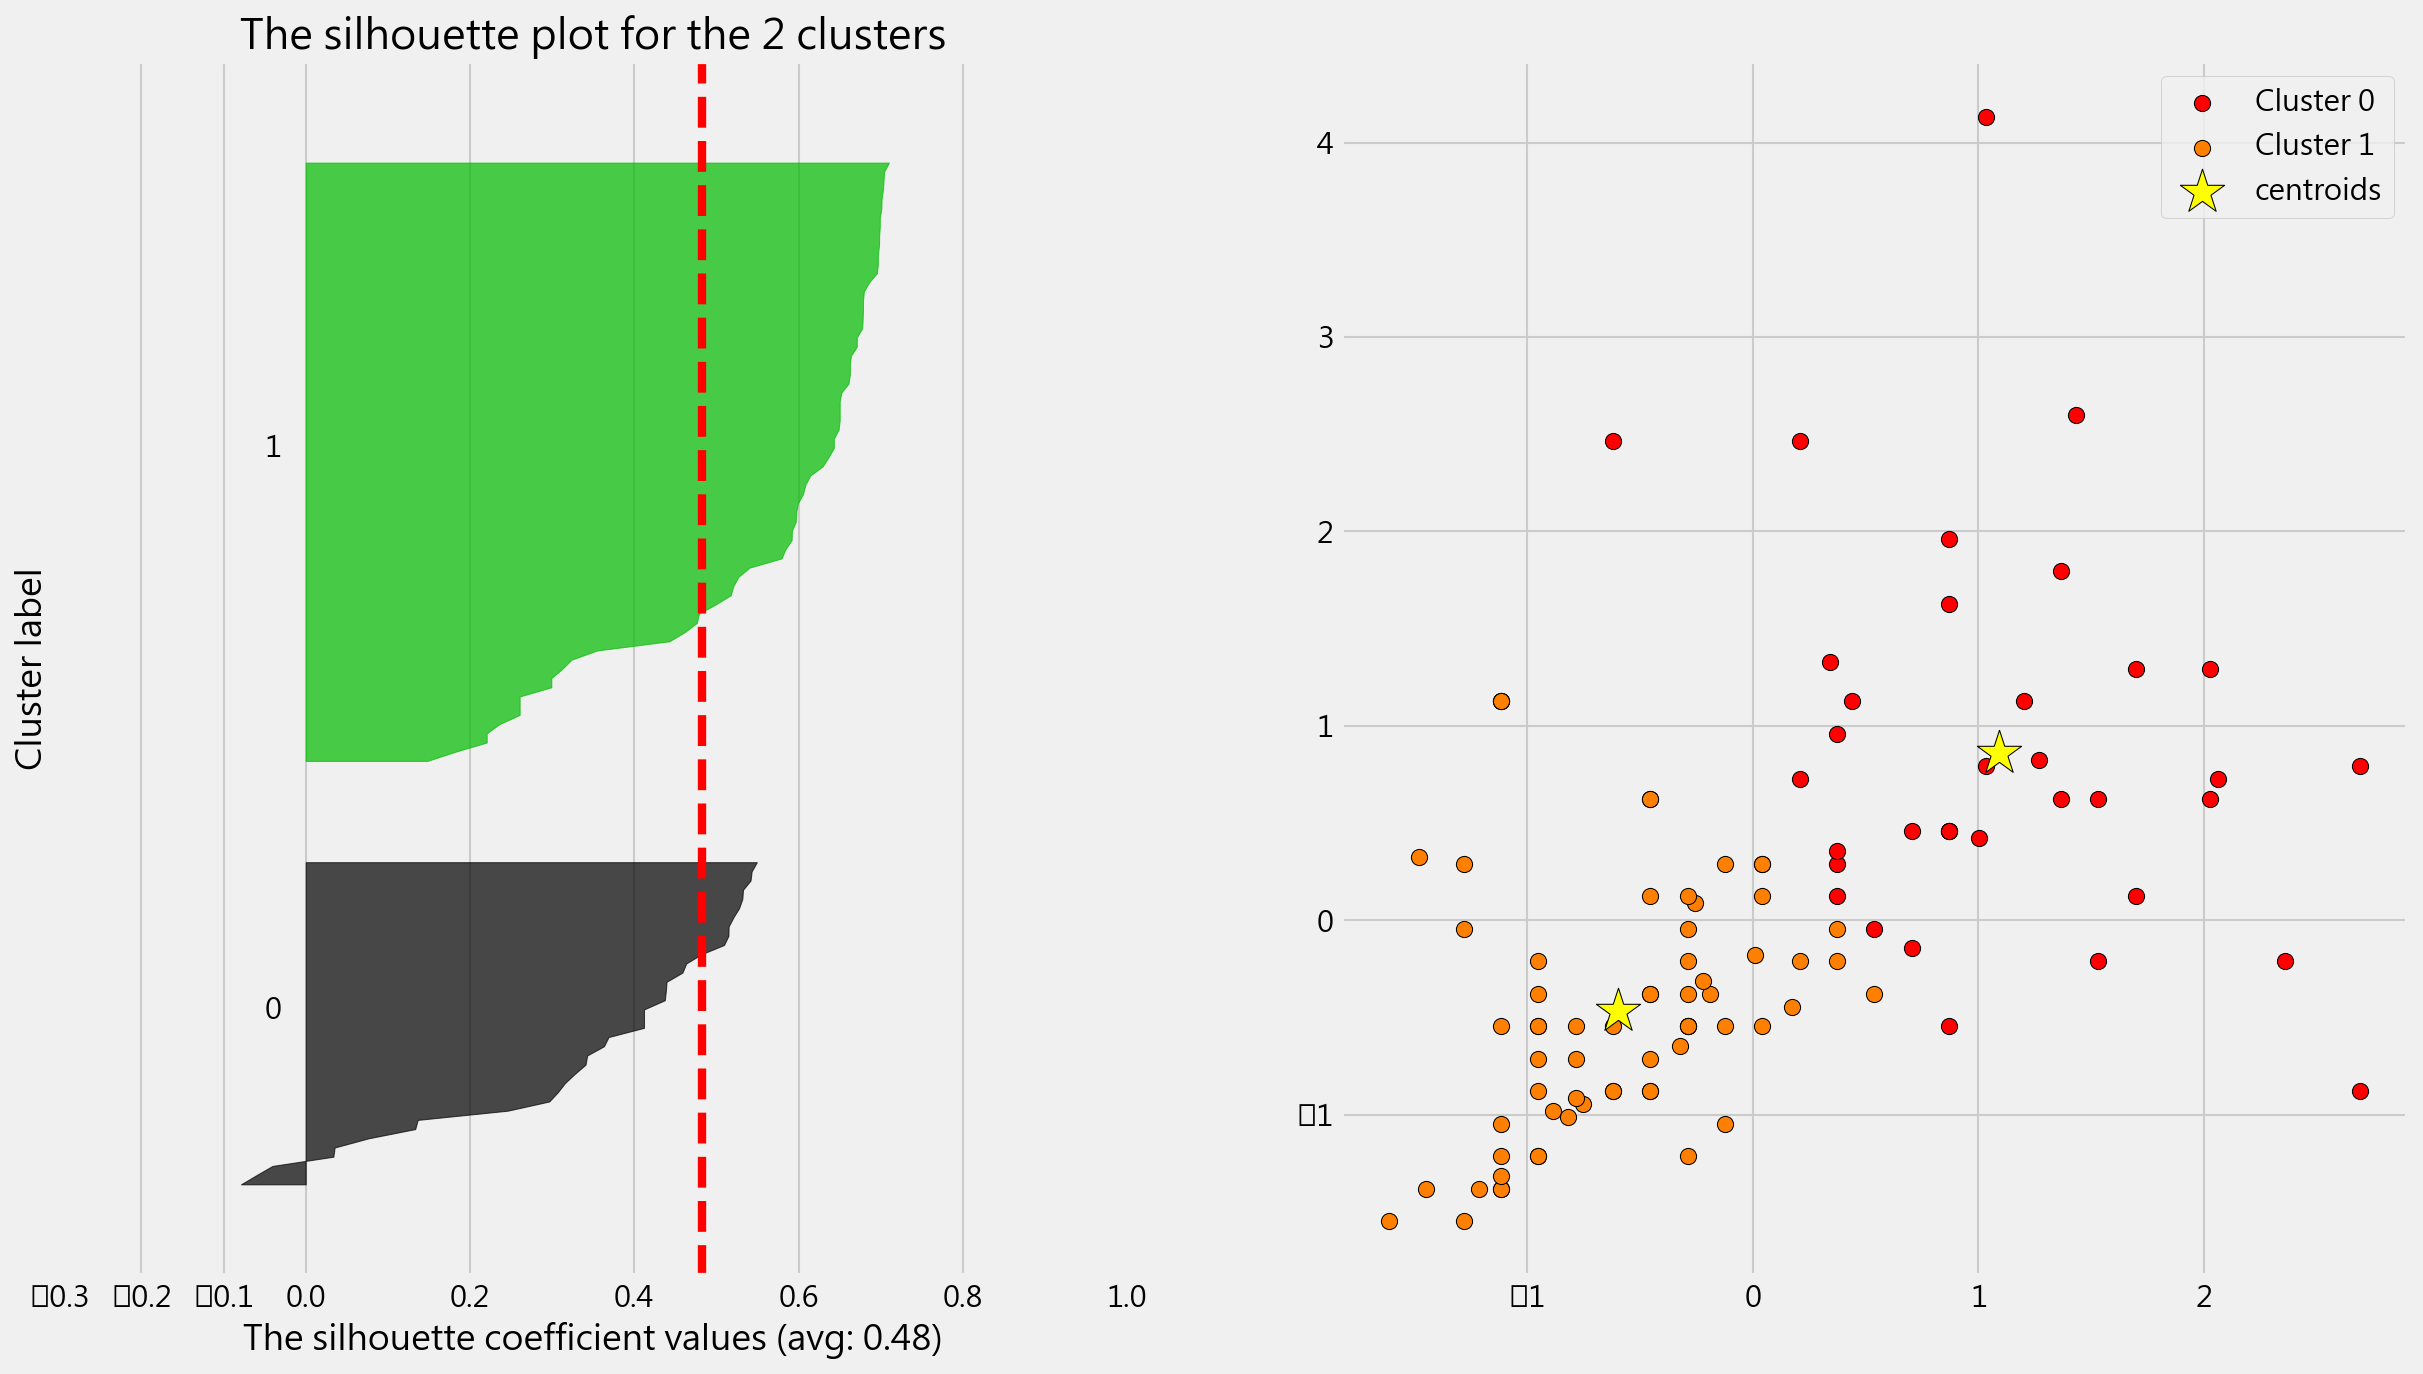

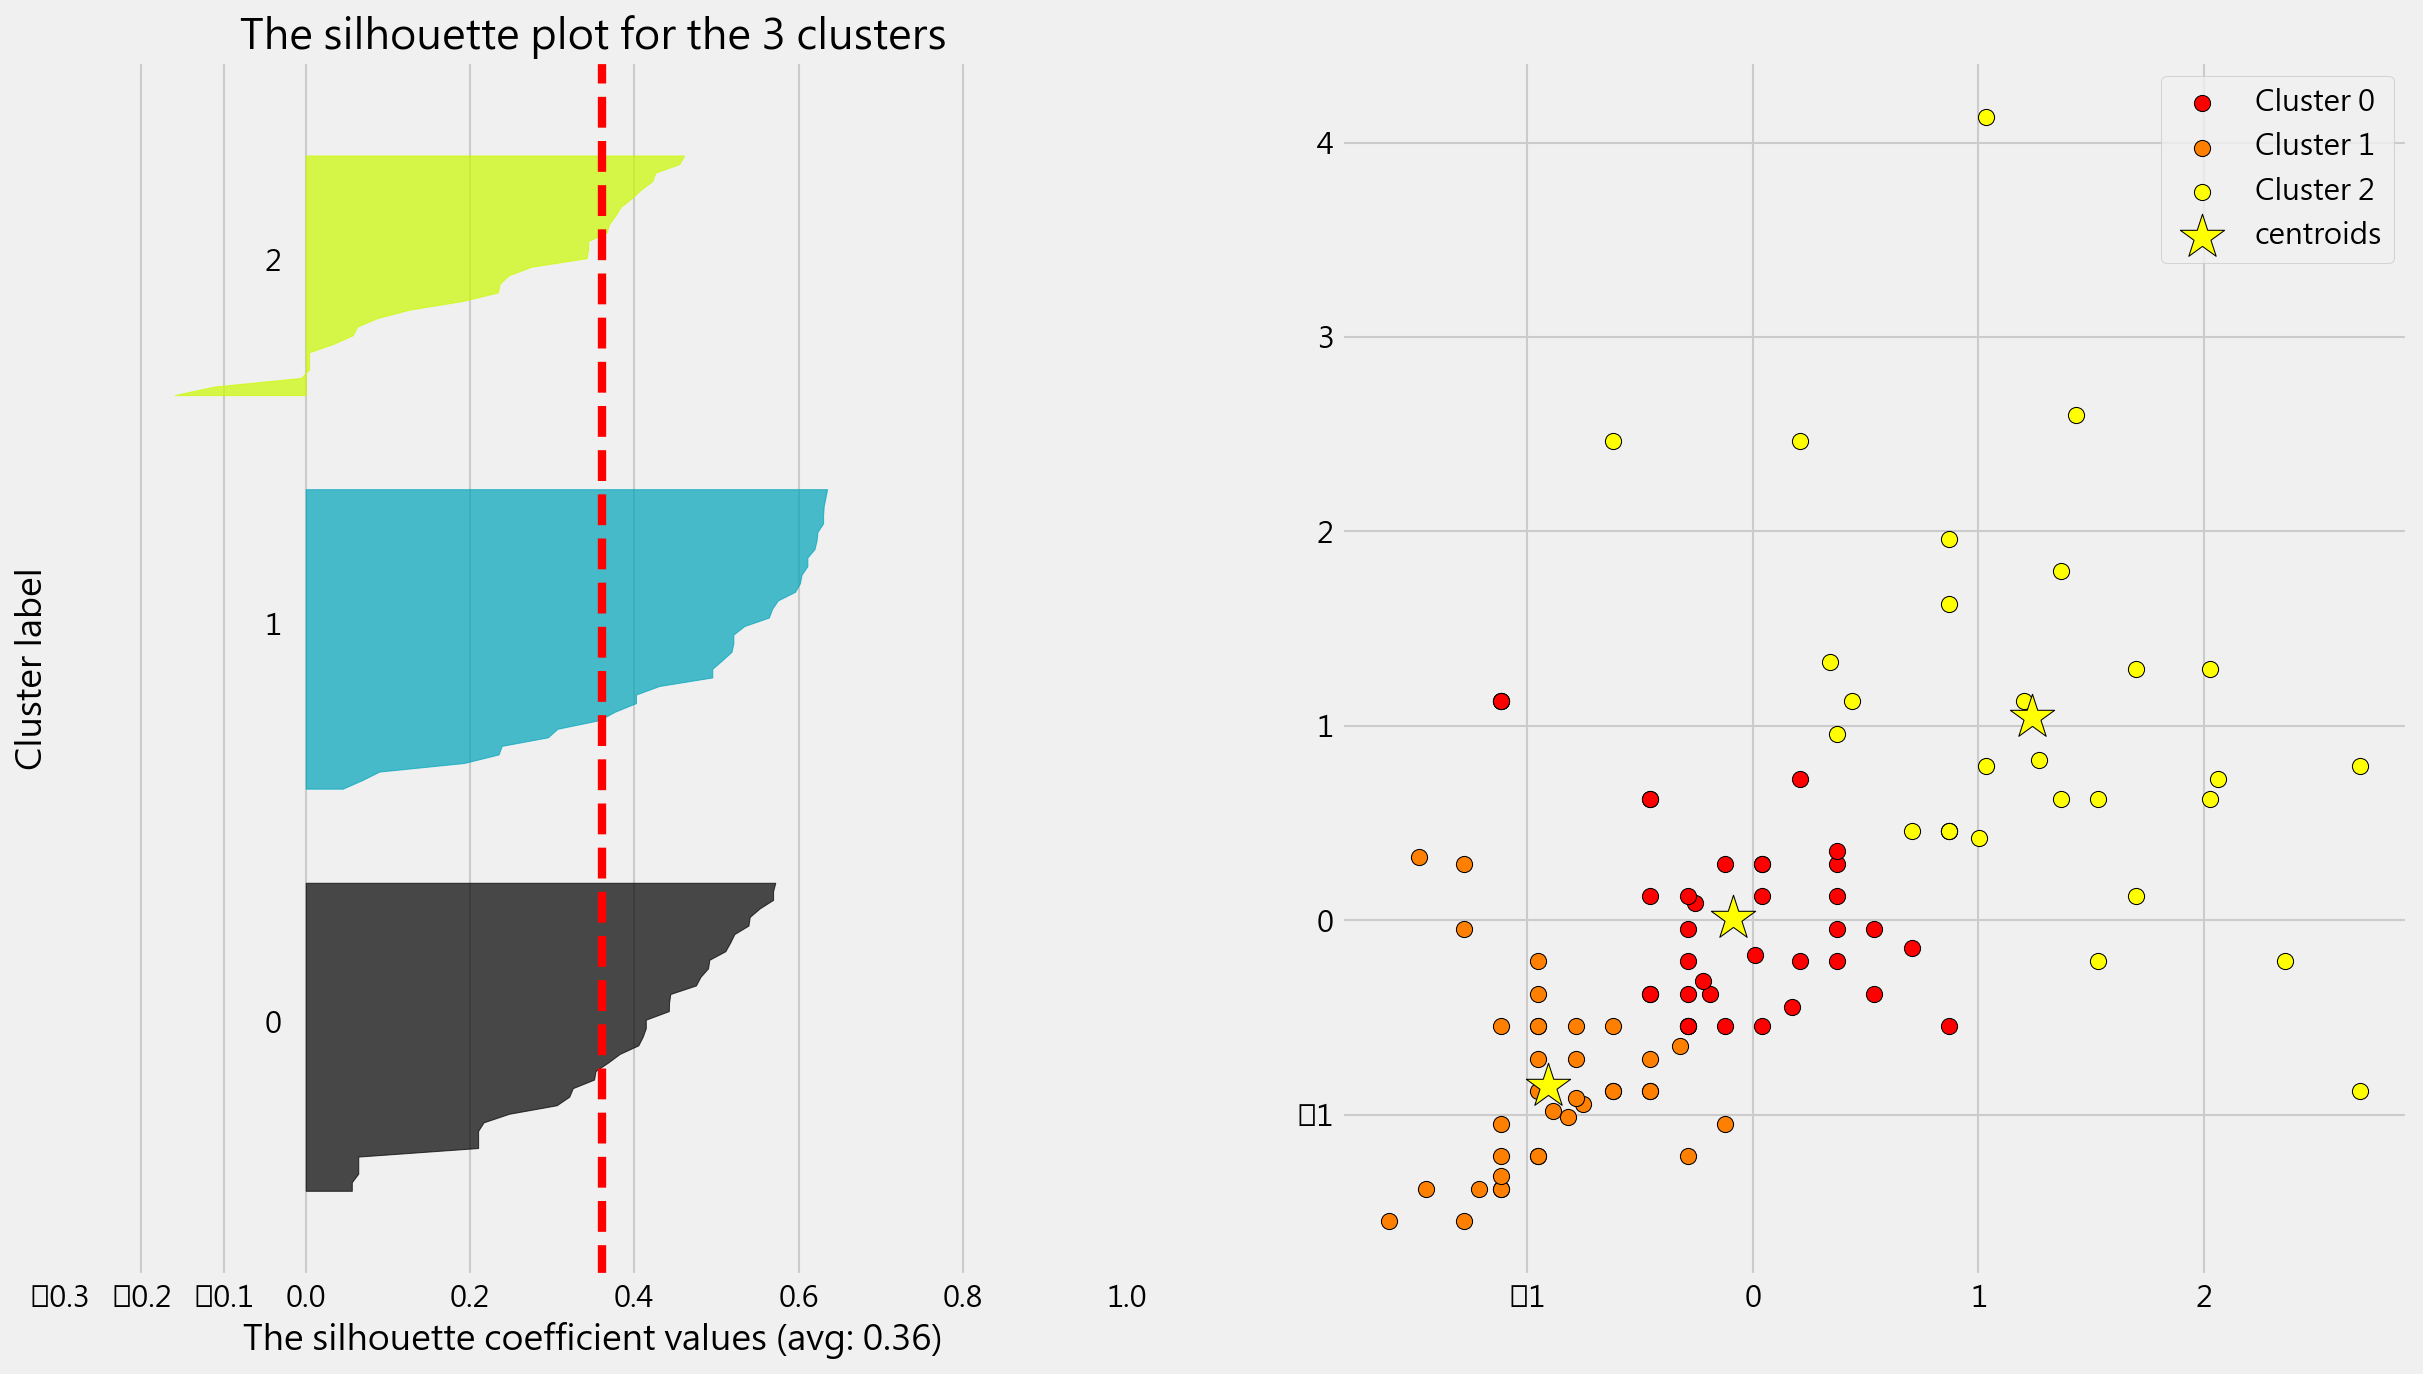

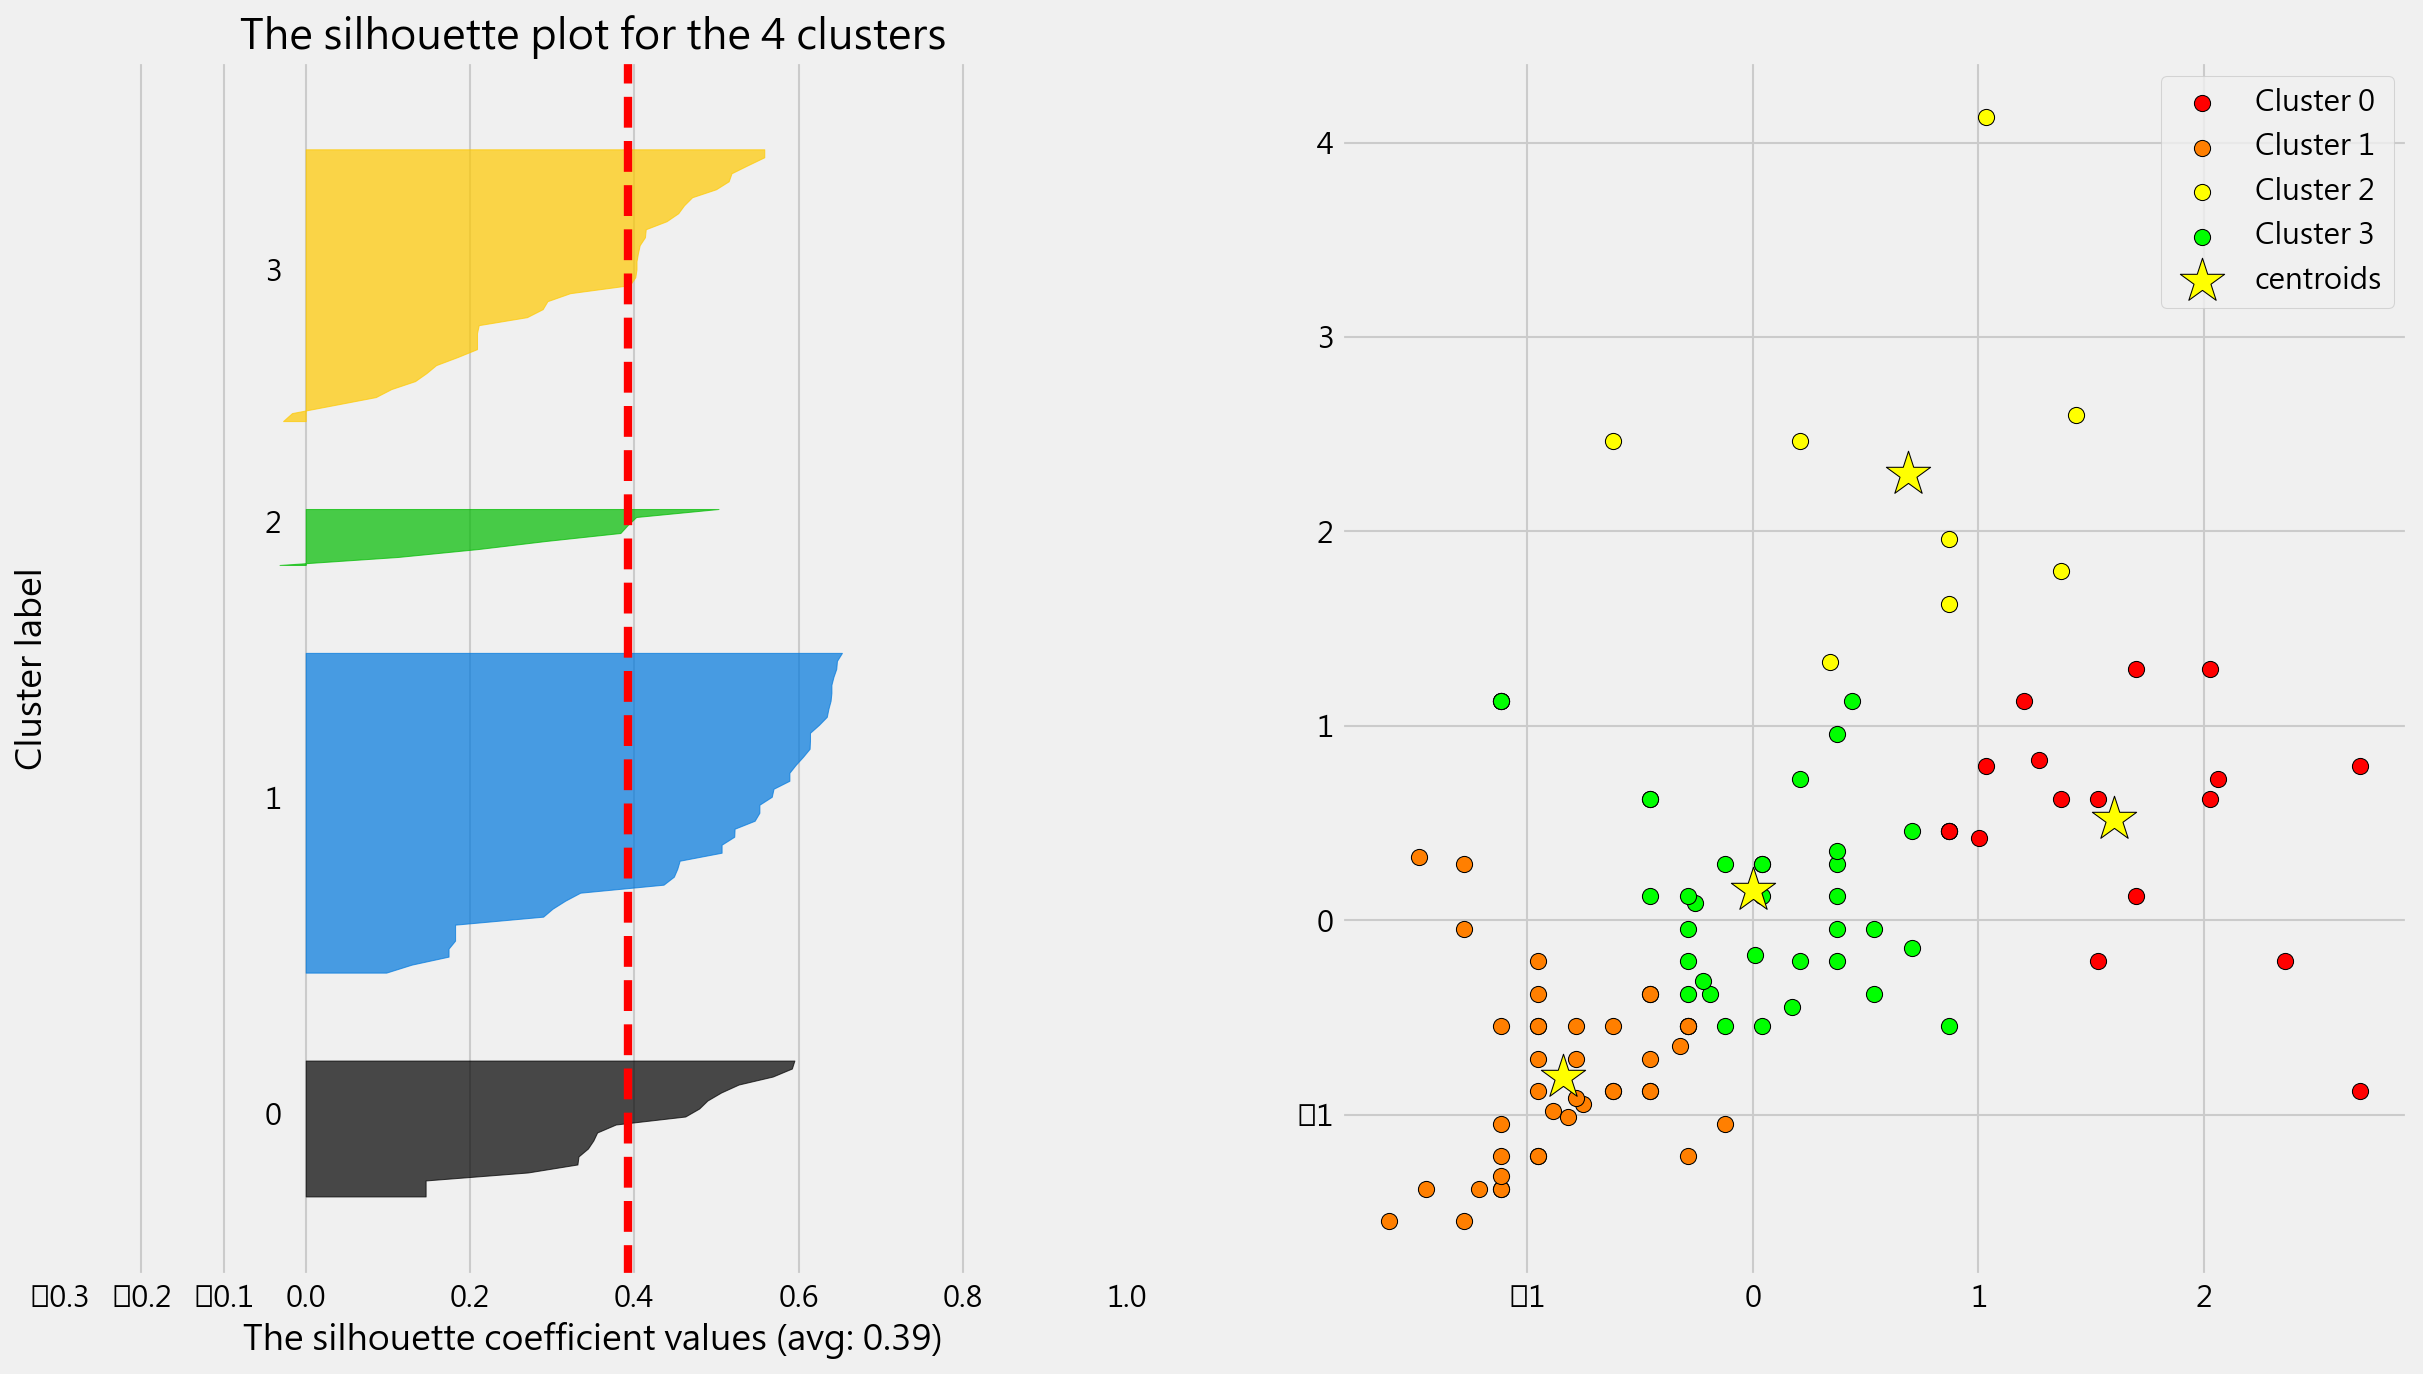

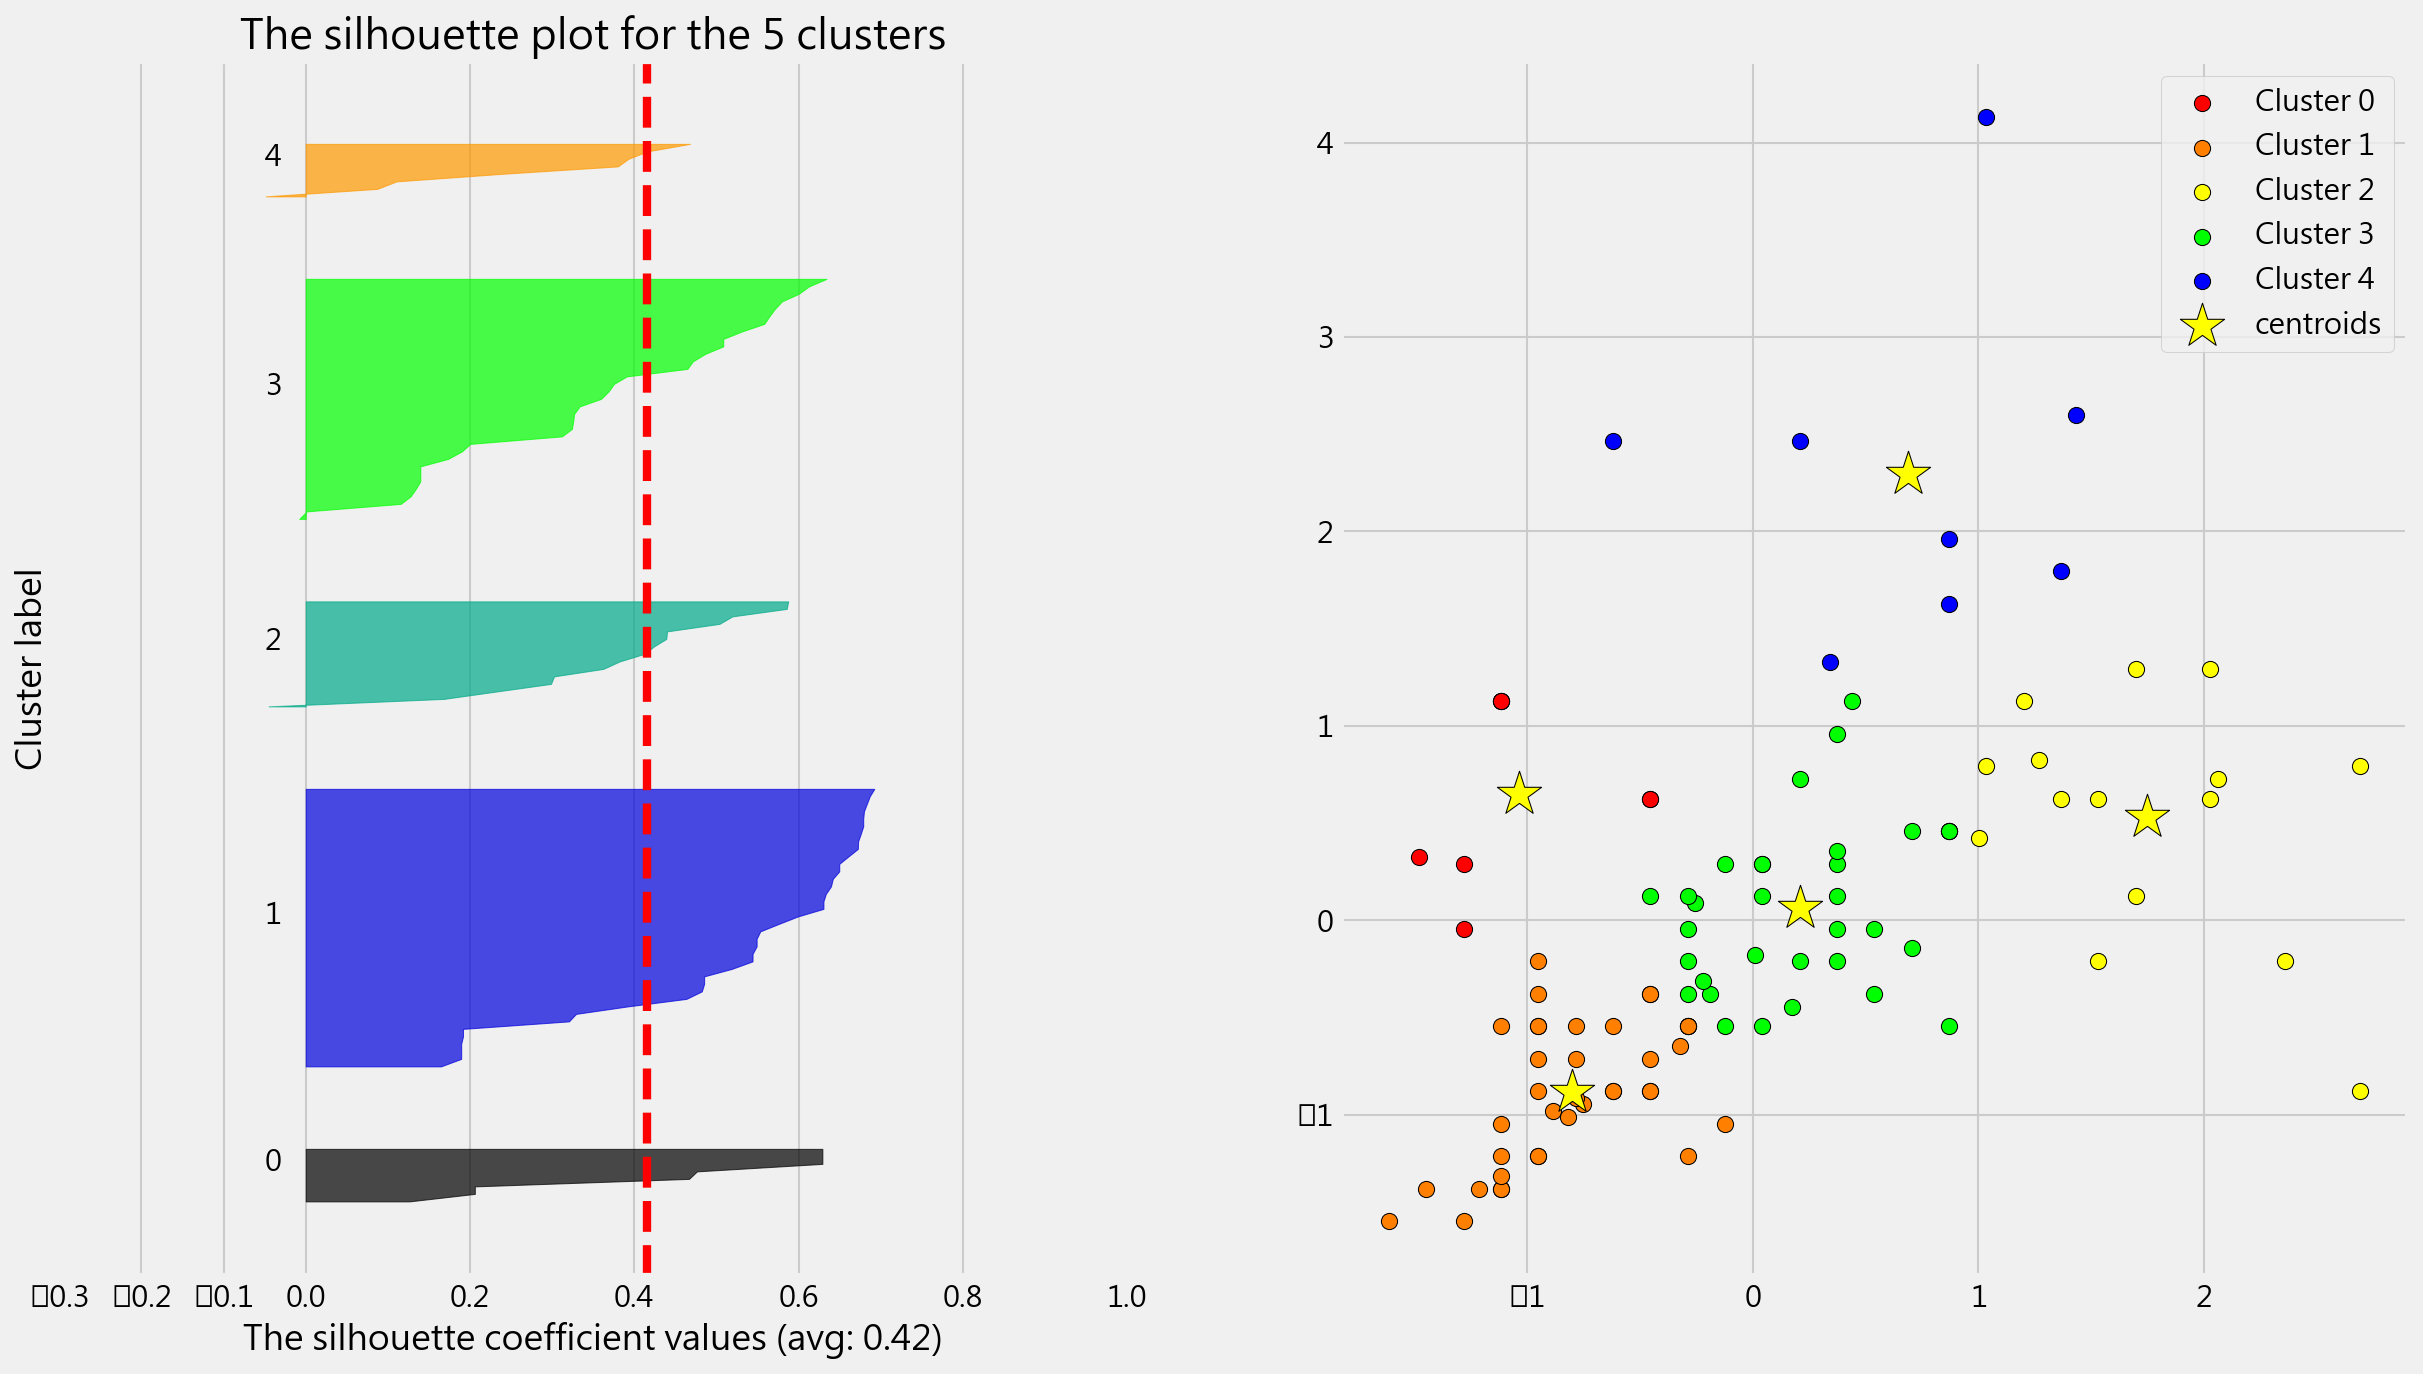

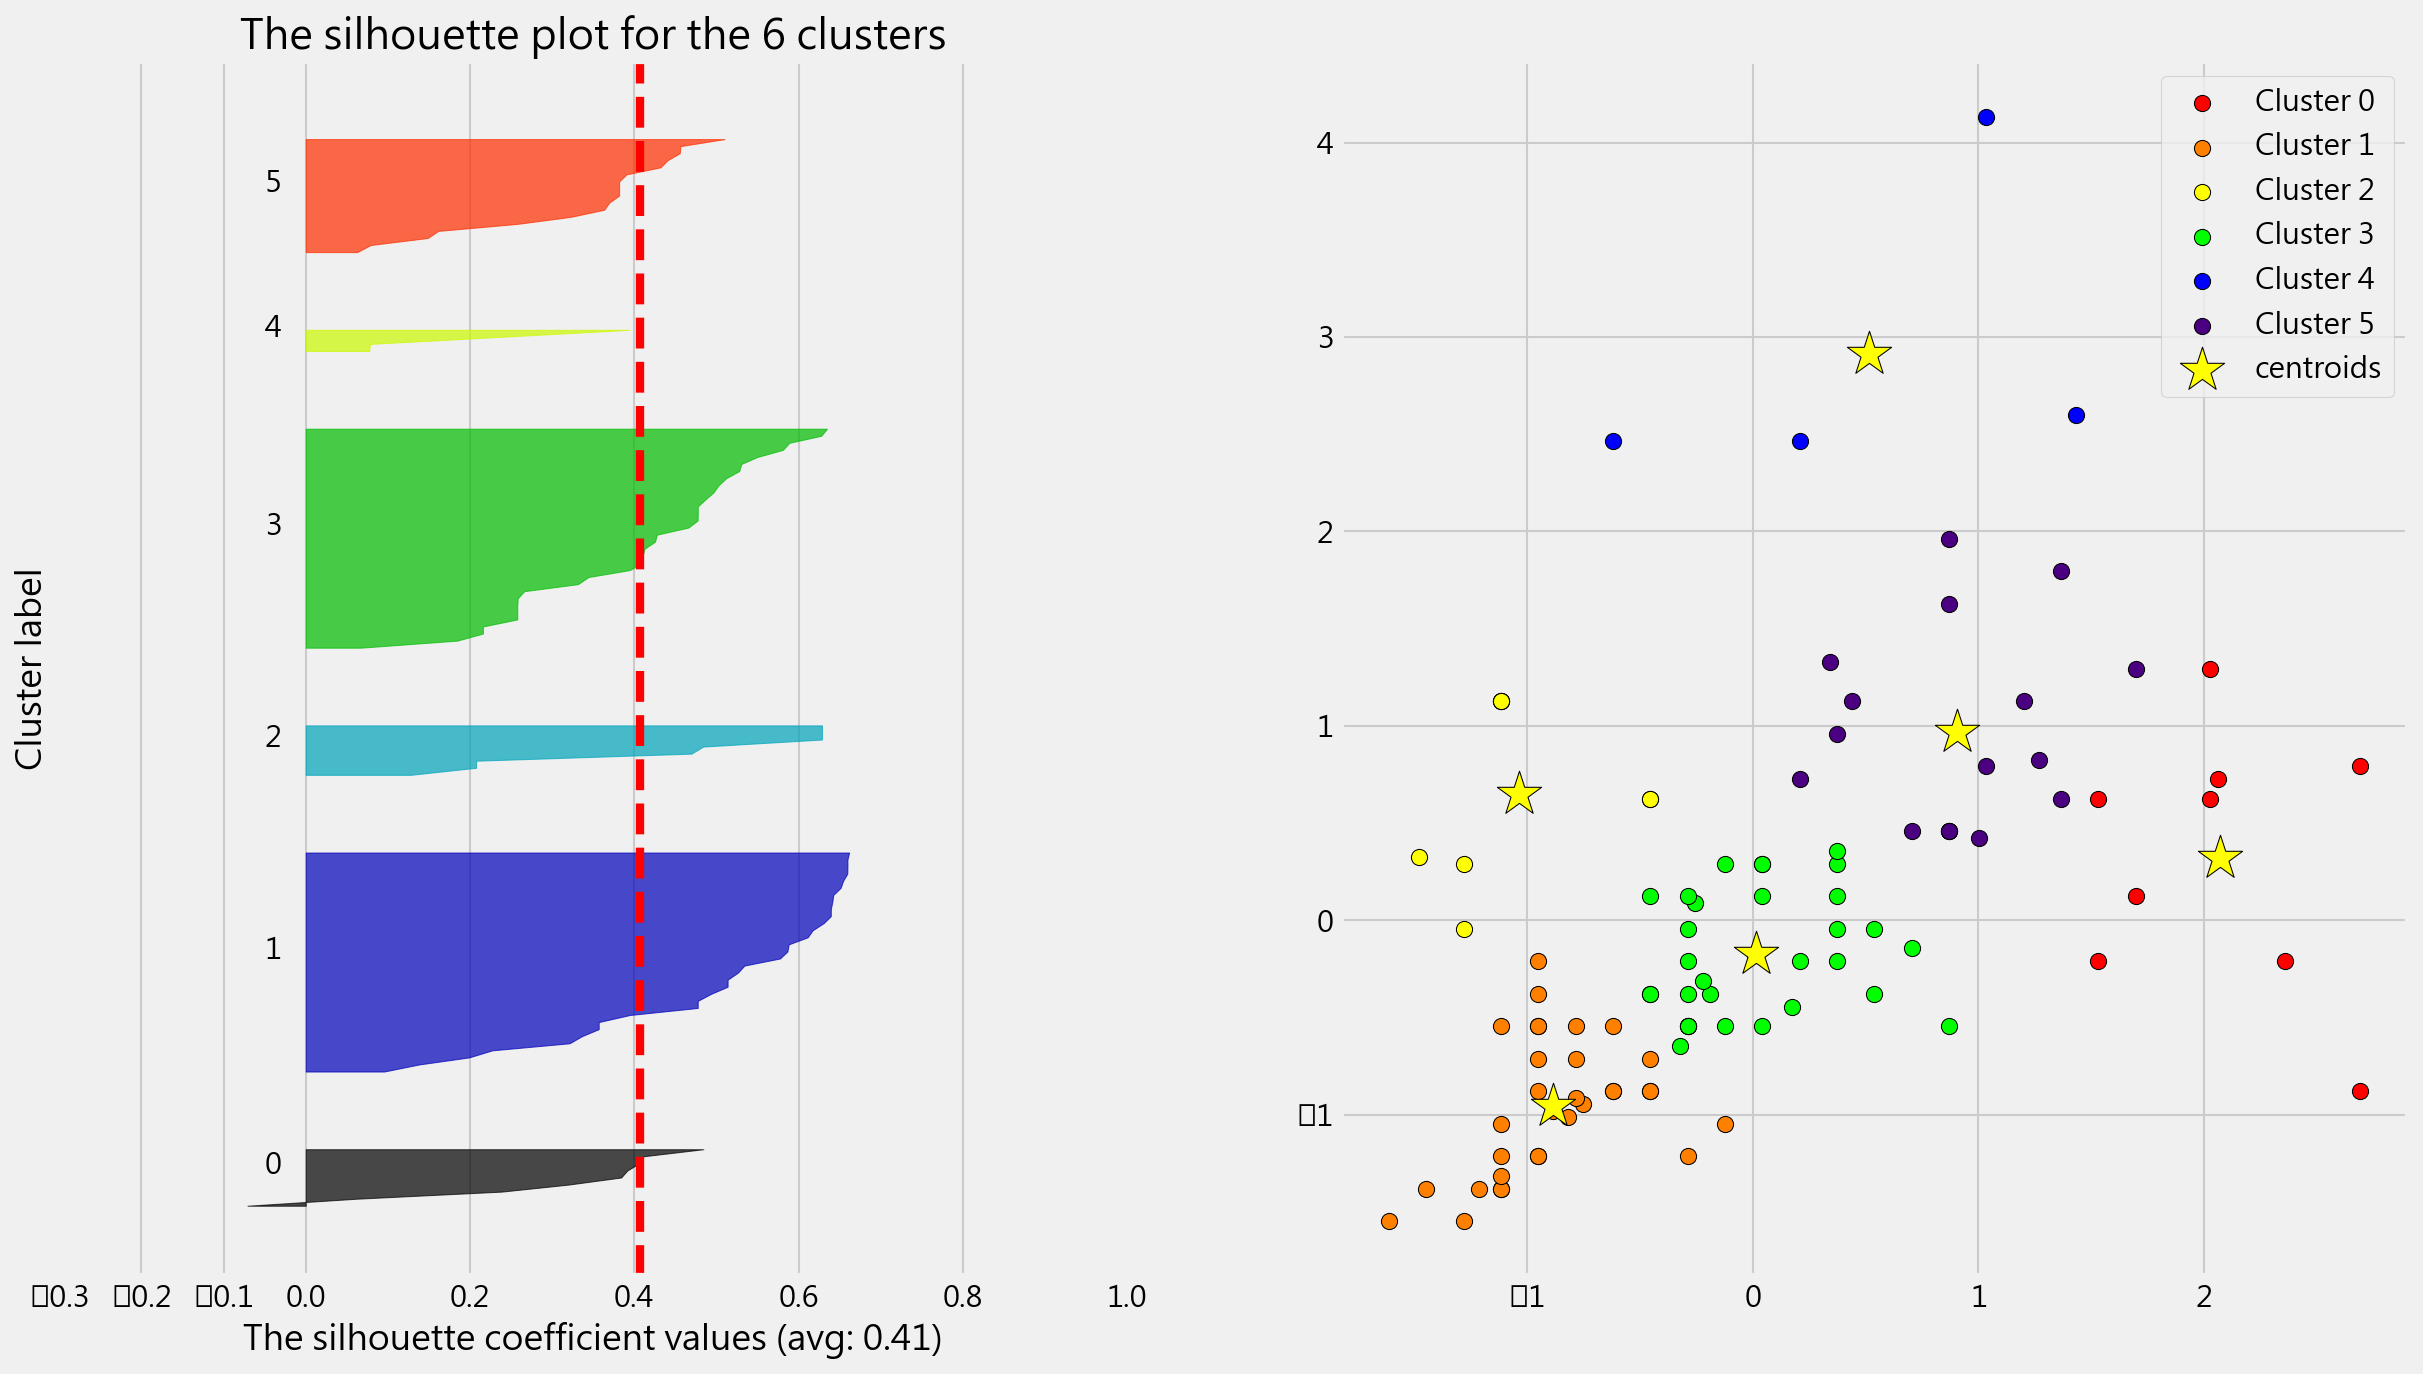

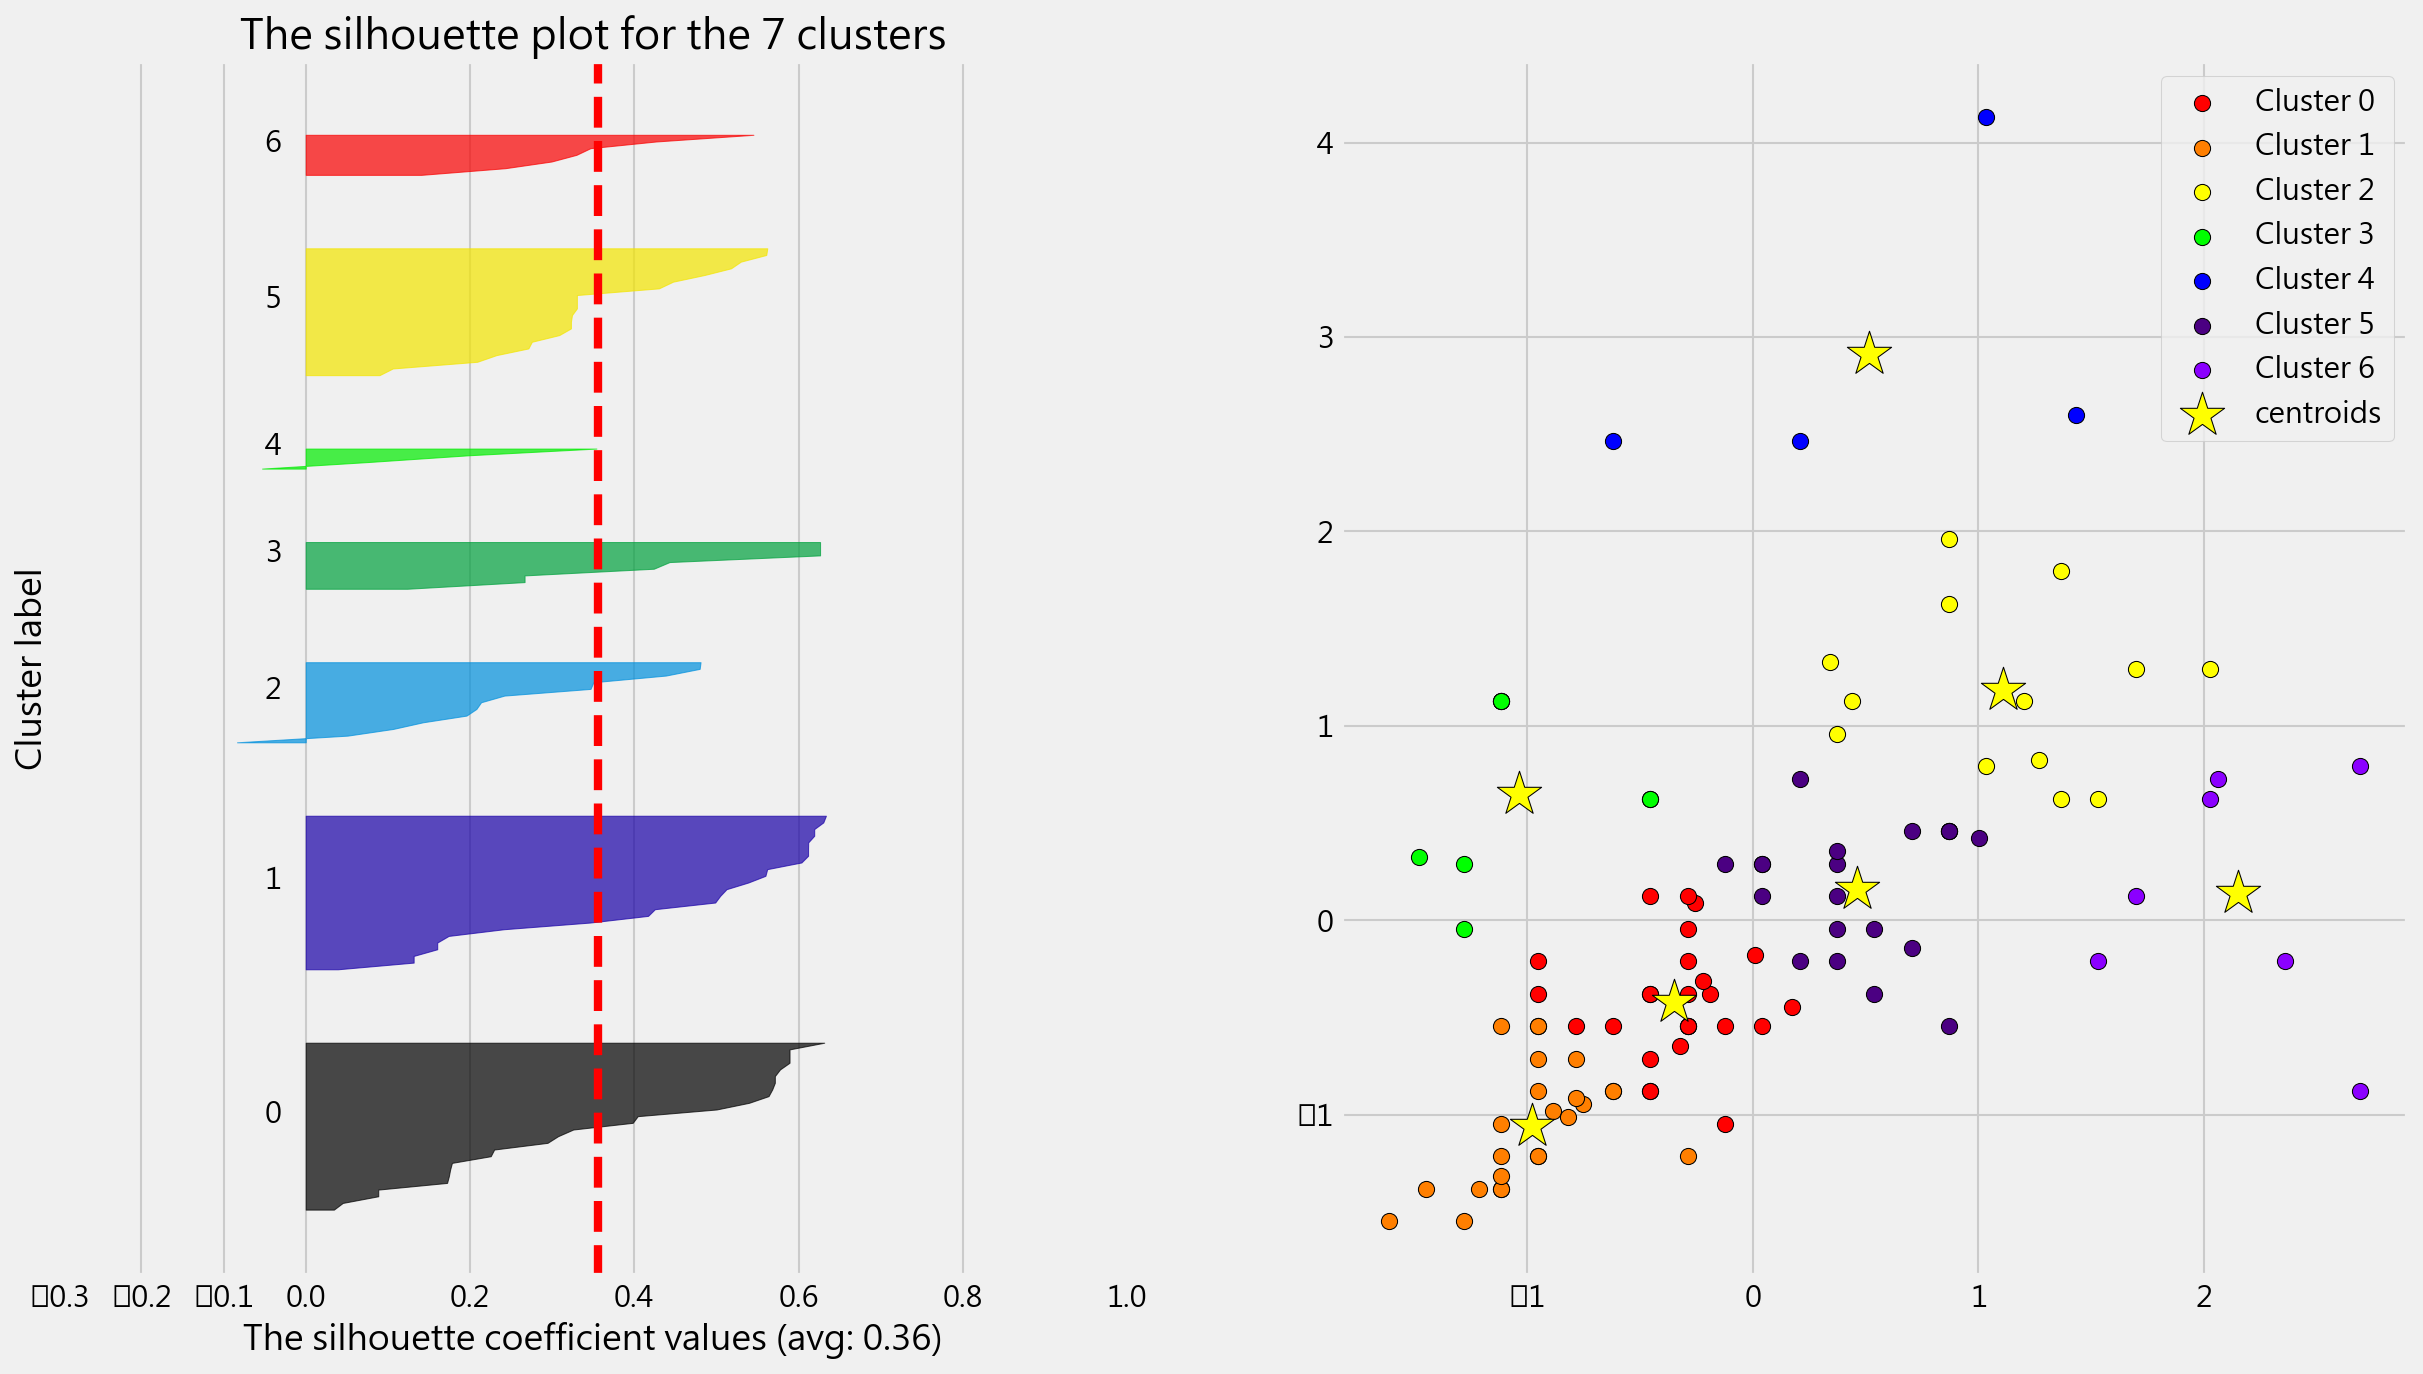

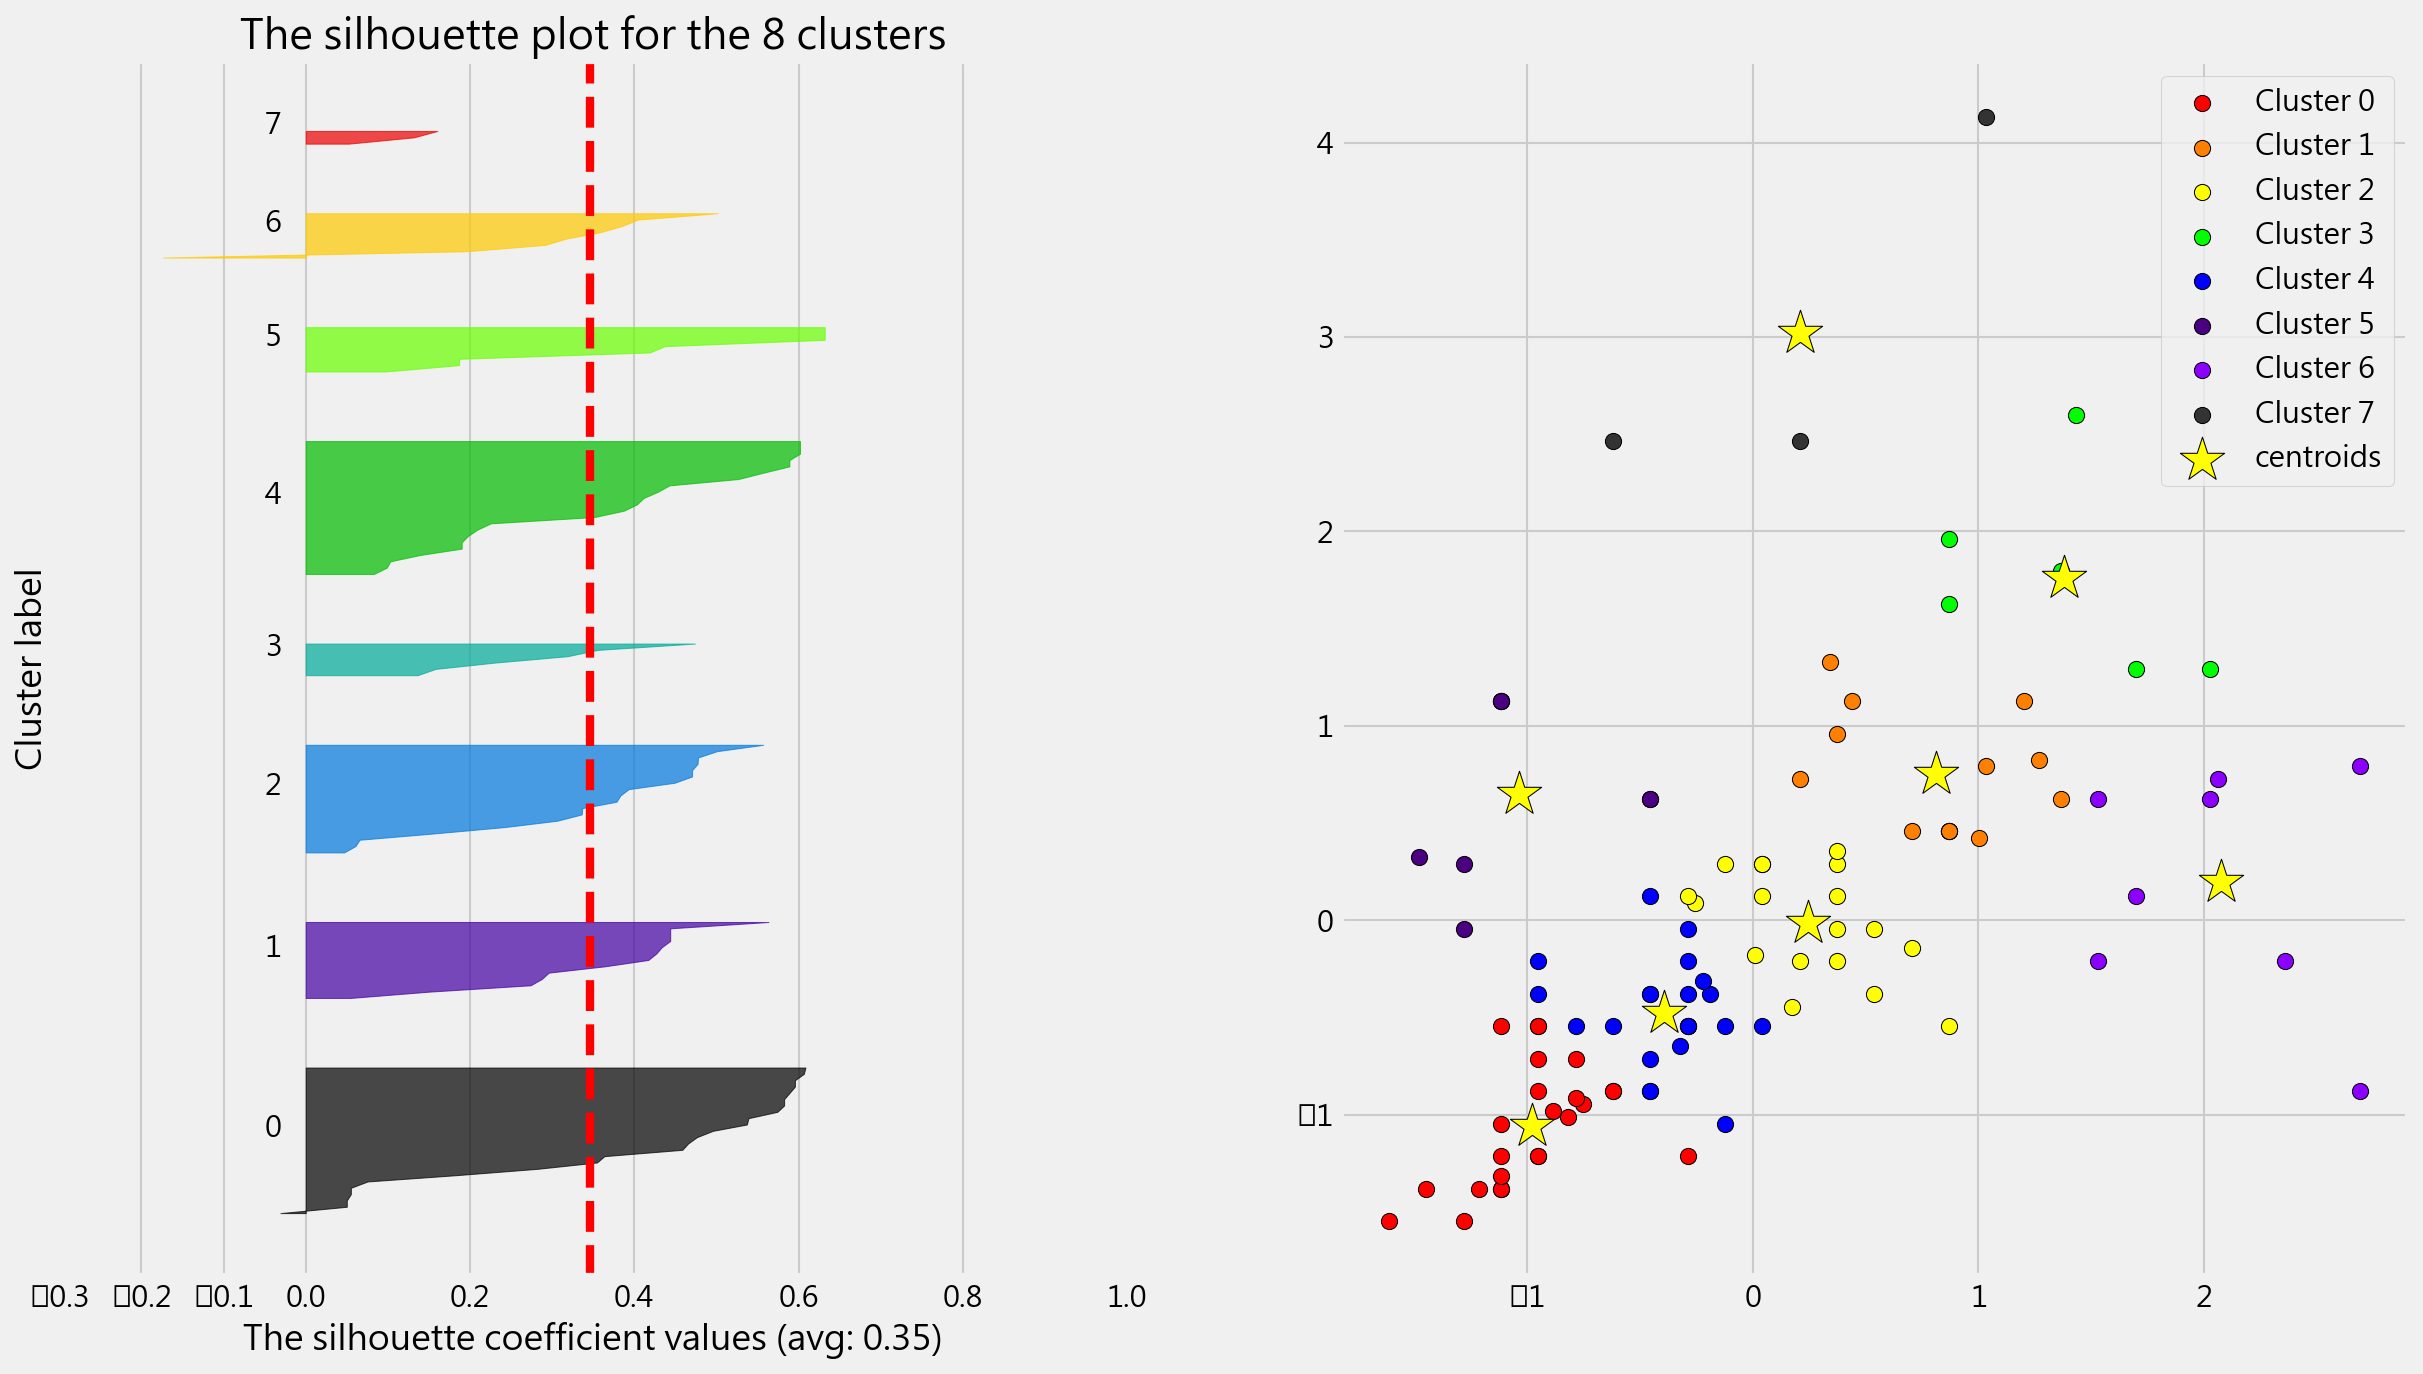

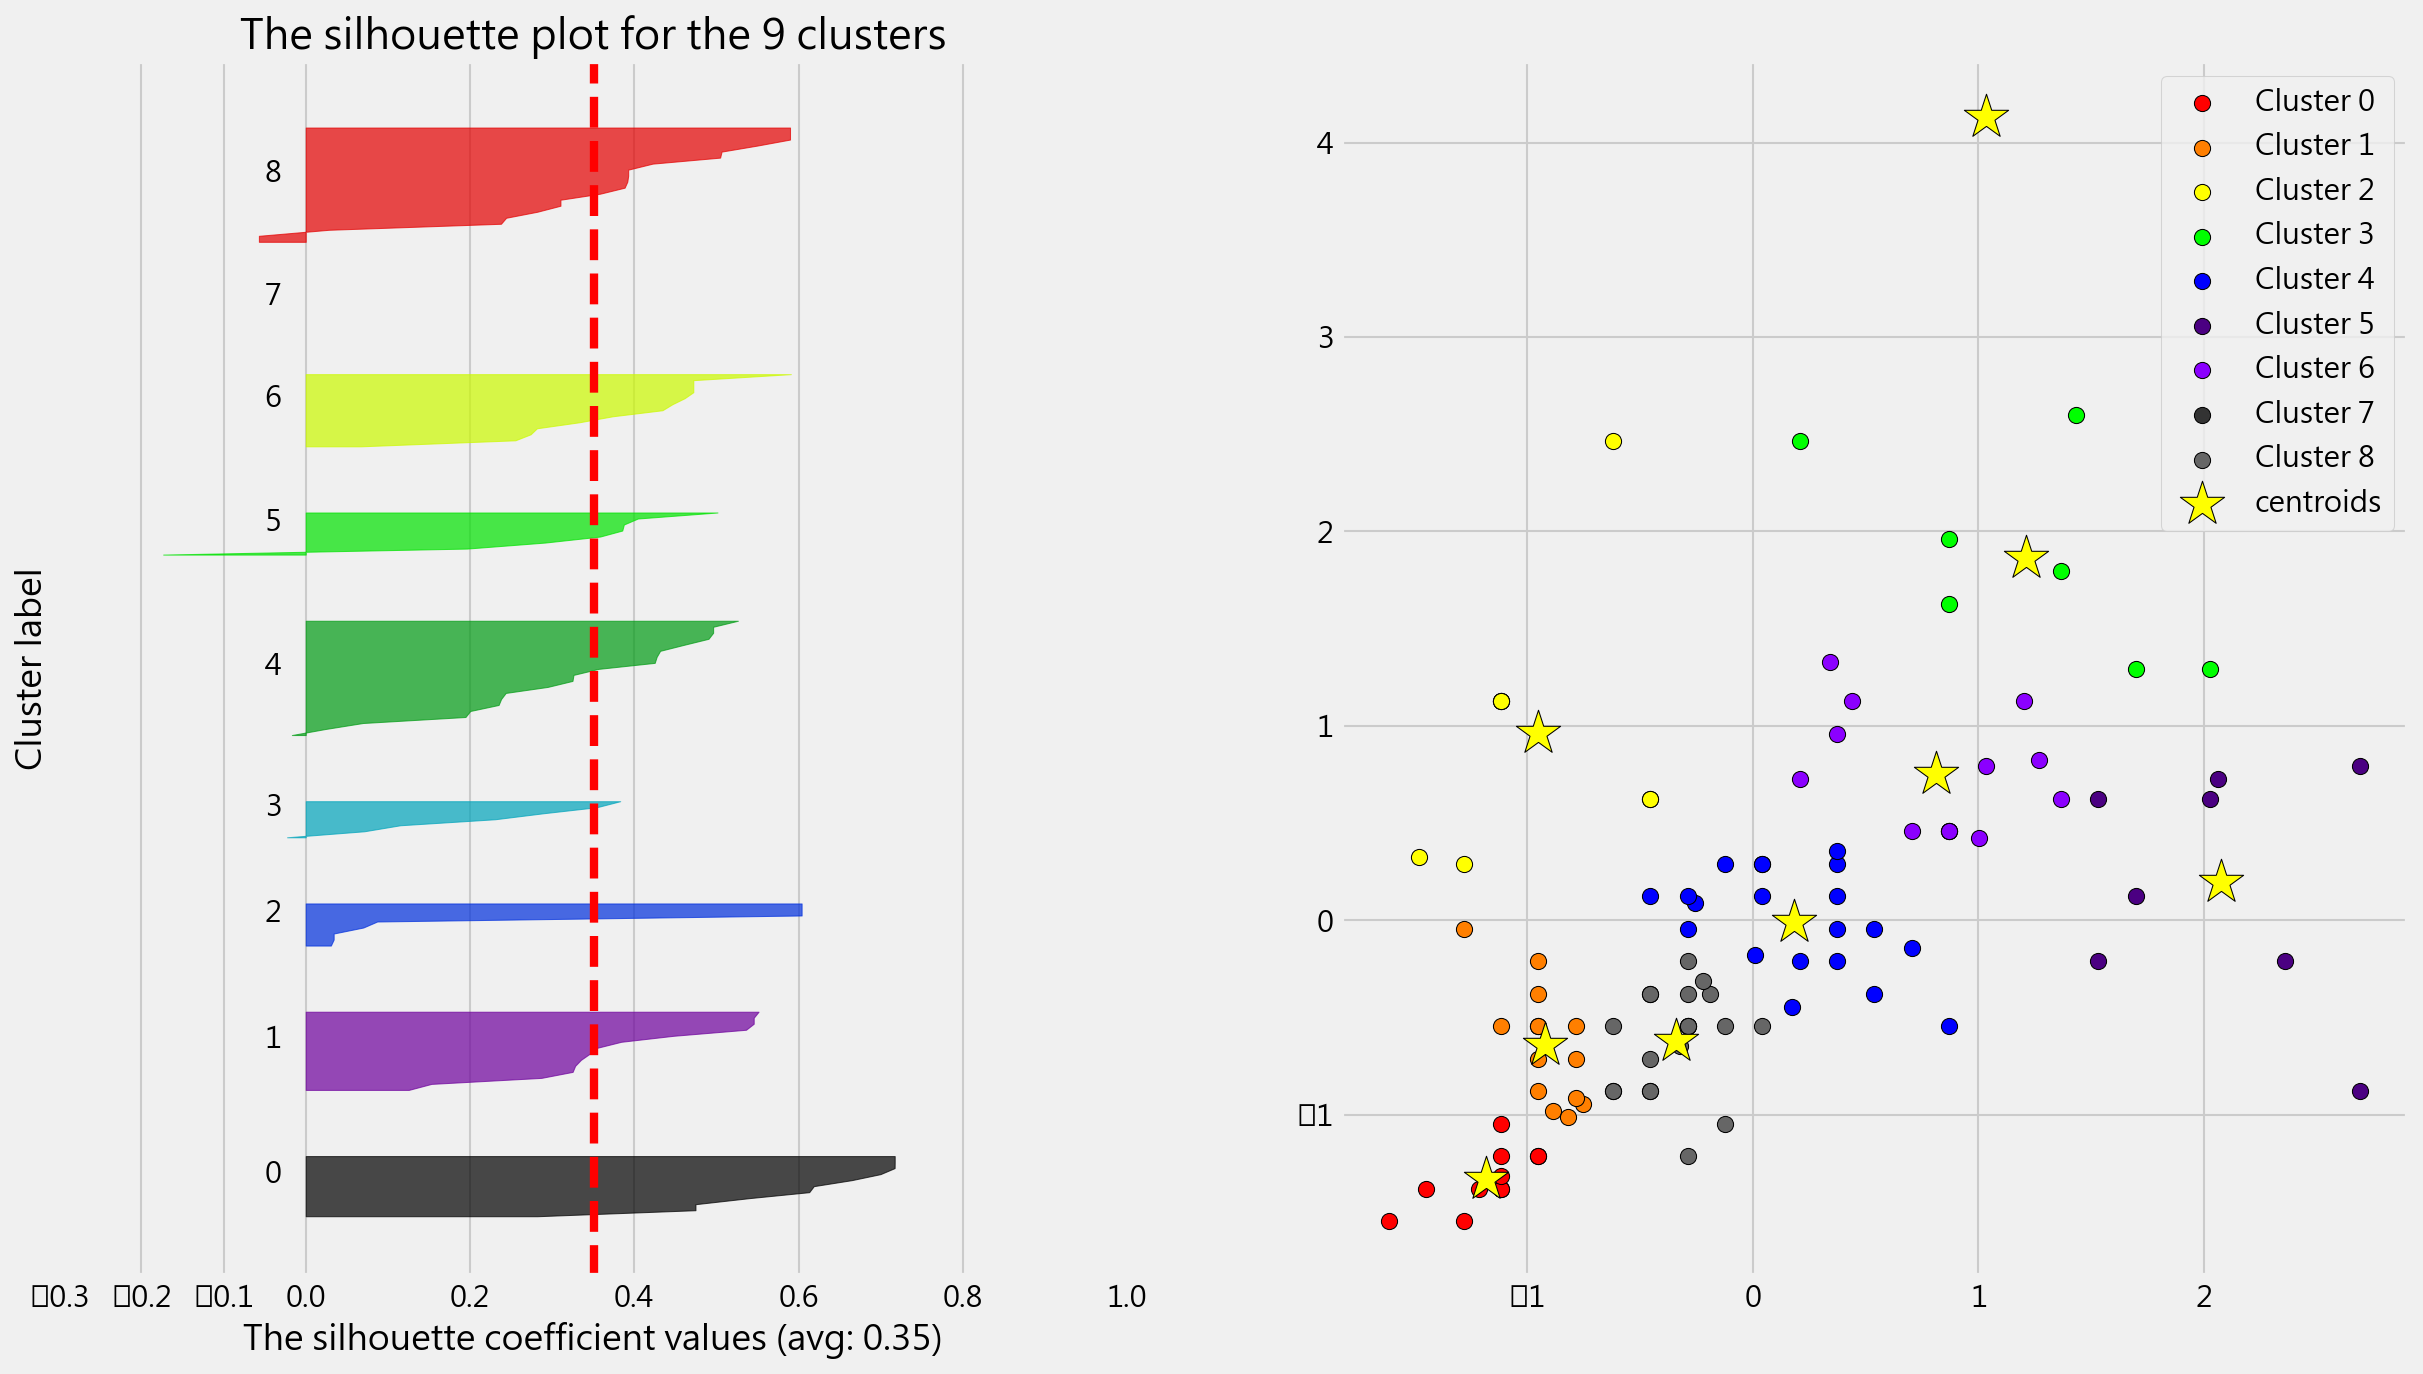

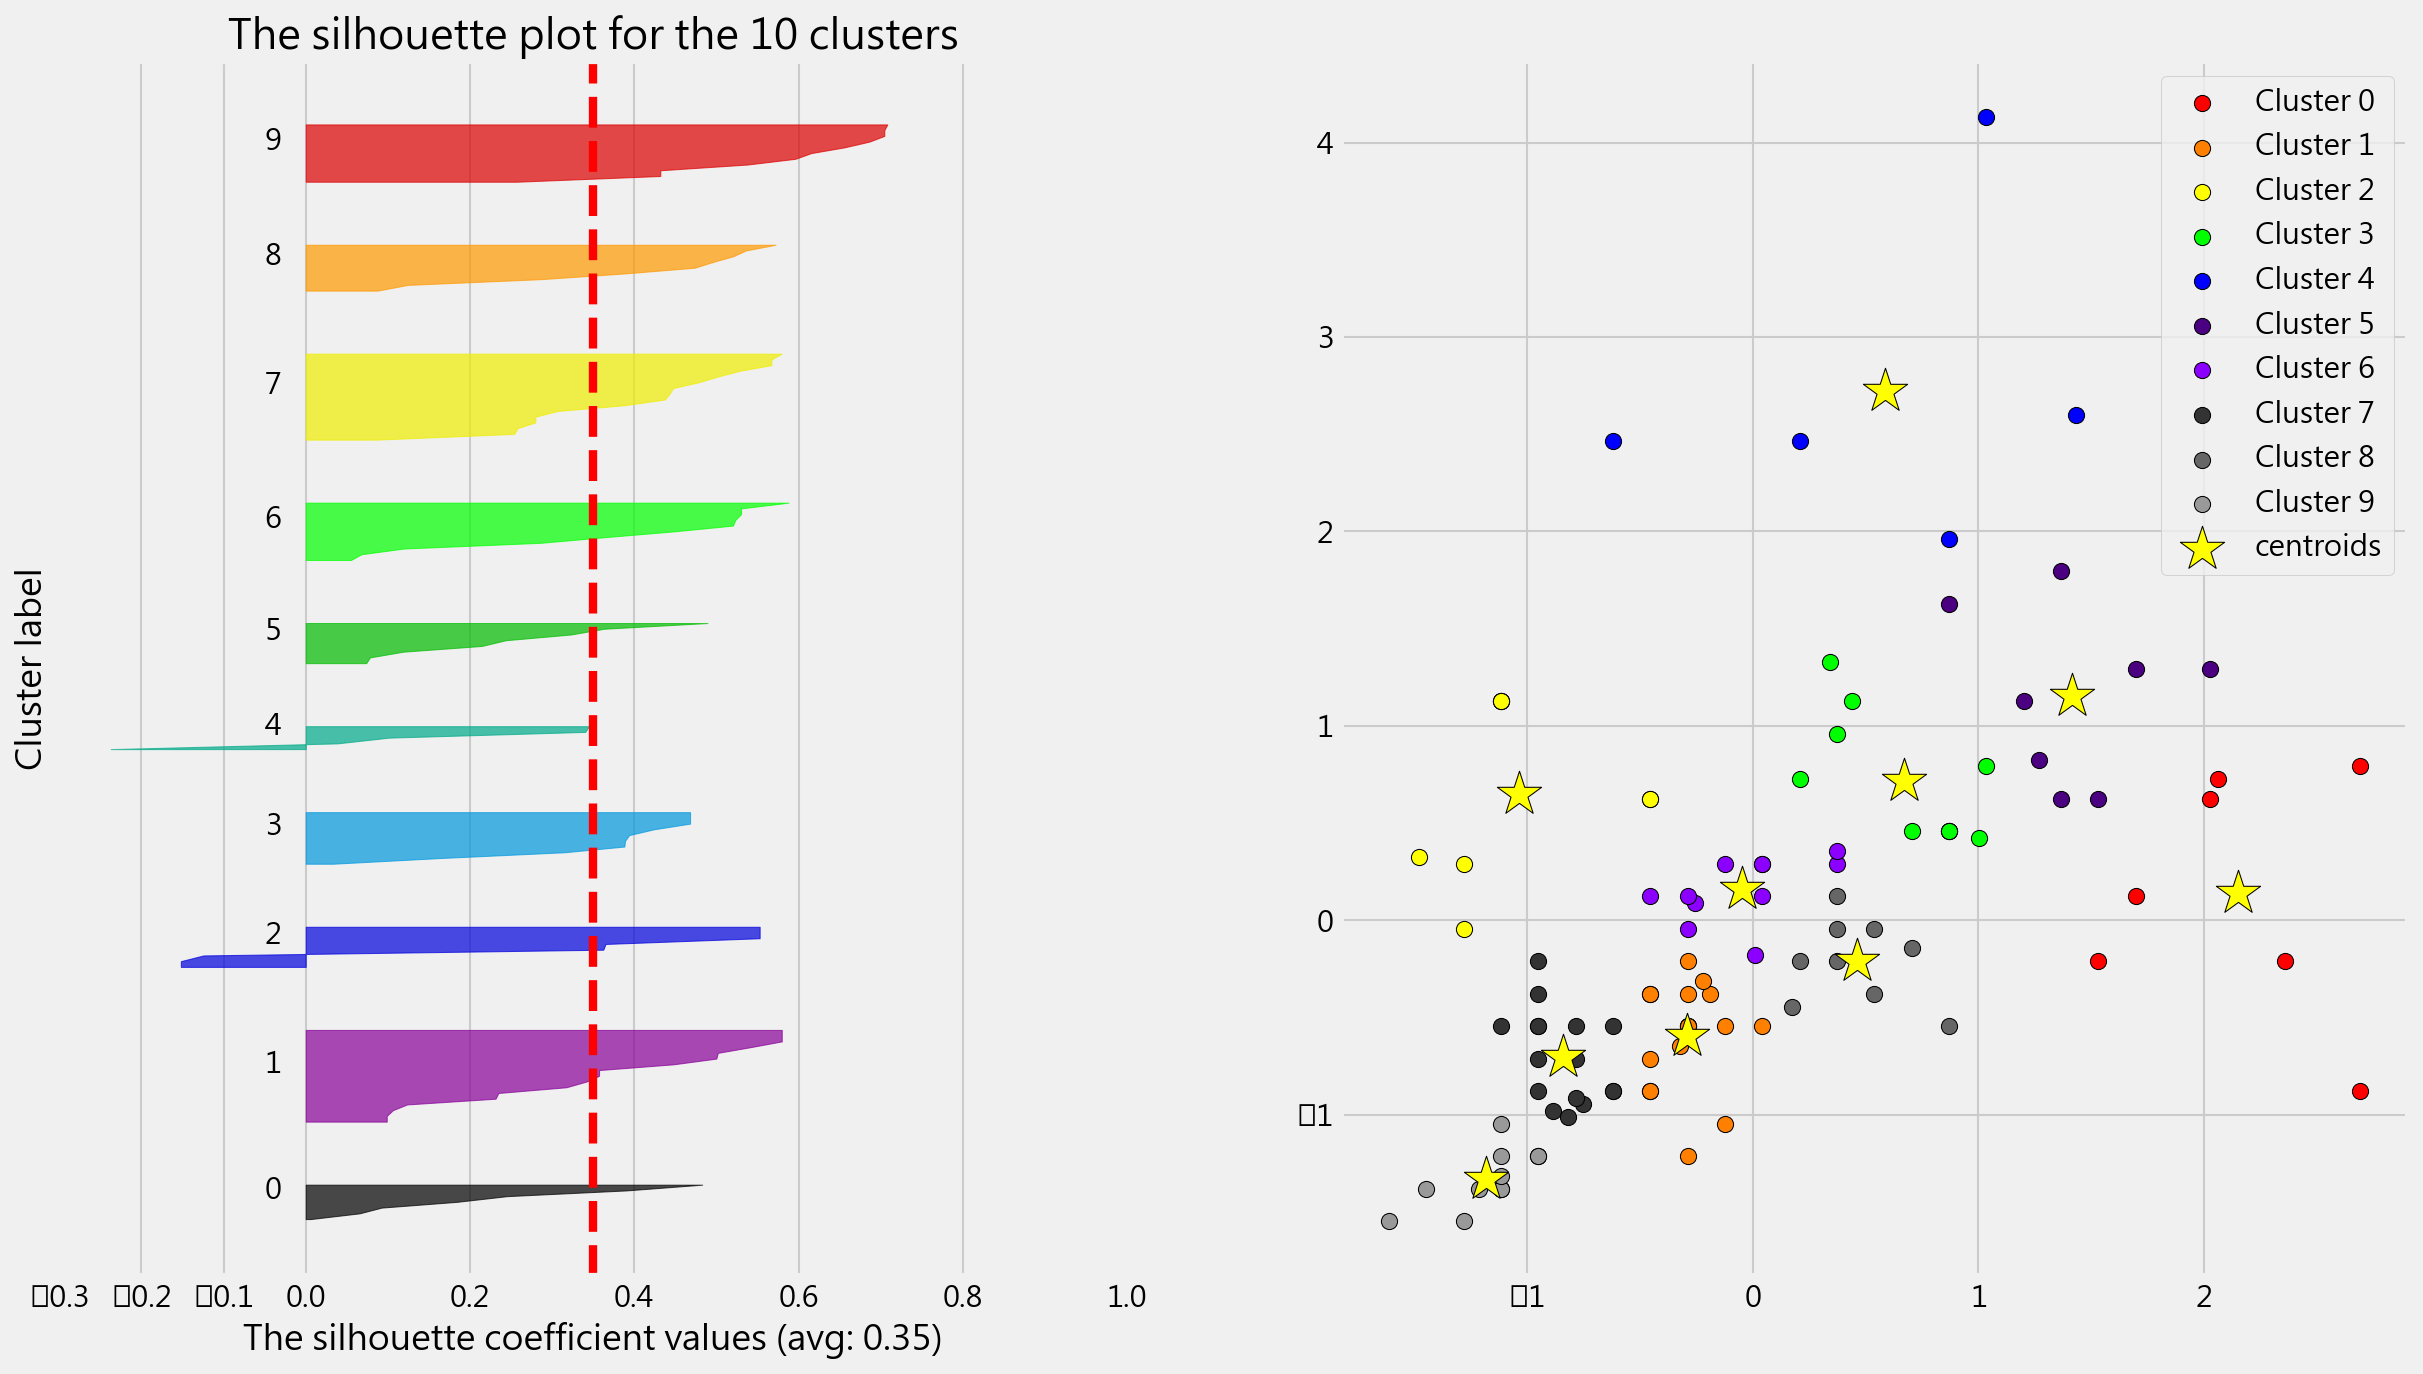

In [17]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

# 分群數量
for n_clusters in range(2, 11):
    # 設定圖表大小 (1 列 2 欄，代表會有 2 張圖表)
    fig, ax = plt.subplots(1, 2, figsize=(18, 10), dpi=150)
    '''
    ax[0]: 用來繪製輪廓係數
    ax[1]: 用來繪製分群結果
    '''

    # 建立 k-means 模型並擬合數據
    km = KMeans(
        n_clusters=n_clusters, 
        init='random',
        random_state=0
    )
    y_pred = km.fit_predict(X_std)

    # 取出分群結果的標籤
    labels = np.unique(y_pred)
    '''
    labels

    當 n_clusters = 2
    labels = [0, 1]

    當 n_clusters = 4
    labels = [0, 1, 2, 3]
    '''

    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(X_std, y_pred)
    print("n_clusters =", n_clusters)
    print("所有樣本的輪廓係數 (平均值) =", silhouette_avg)
    
    # 計算每個樣本的輪廓係數
    silhouette = silhouette_samples(
        X_std, 
        y_pred, 
        metric='euclidean'
    )
    '''
    silhouette -> ArrayLike
    有 102 個樣本，所以 silhouette 有 102 個值
    '''

    # 設定 y 軸的下限
    y_lower = 10

    # 雖然輪廓係數範圍是[-1, 1]，但這裡只顯示[-0.2, 0.8]之間
    ax[0].set_xlim([-0.3, 1.0])
    ax[0].set_ylim([0, len(X_std) + (n_clusters + 1) * 10])

    # 繪製輪廓係數
    for i, label in enumerate(labels):
        # 取出 label 為 c 的輪廓係數
        c_silhouette = silhouette[y_pred == label]

        # 由小到大排序
        c_silhouette.sort()

        # 計算集群 i 的大小
        size_cluster_i = c_silhouette.shape[0]

        # 計算 y 軸的上限
        y_upper = y_lower + size_cluster_i

        # 設定顏色
        color = cm.nipy_spectral(float(i)/n_clusters)

        # 繪製輪廓係數
        ax[0].fill_betweenx(
            np.arange(y_lower, y_upper), 
            0, 
            c_silhouette, 
            facecolor=color, 
            edgecolor=color, 
            alpha=0.7
        )

        # 標示集群標籤
        ax[0].text(
            -0.05, 
            y_lower + 0.5 * size_cluster_i, 
            str(i)
        )

        # 計算下一個集群的 y_lower
        y_lower = y_upper + 10
    
    # 設定 x, y 軸標籤
    ax[0].set_xlabel(f"The silhouette coefficient values (avg: {silhouette_avg:.2f})")
    ax[0].set_ylabel("Cluster label")

    # 設定標題
    ax[0].set_title(f"The silhouette plot for the {n_clusters} clusters")
    
    # 繪製輪廓係數平均值
    ax[0].axvline(x=silhouette_avg, color="red", linestyle="--")

    # 設定 y 和 x 軸的刻度
    ax[0].set_yticks([])
    ax[0].set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])

    # 繪製樣本點
    for i in range(n_clusters):
        ax[1].scatter(
            X_std[y_pred==i, 0], # 預測為第 i 群的 SpecialAtk
            X_std[y_pred==i, 1], # 預測為第 1 群的 SpecialDef
            color=colors[i], # 設定顏色
            edgecolor='k', # 邊緣顏色
            s=60, # 點的大小
            label='Cluster ' + str(i) # 標籤
        )

    # 繪製各群的中心點 (centroids) (註: km.cluster_centers_ 是 KMeans 的中心點)
    ax[1].scatter(
        km.cluster_centers_[:, 0], 
        km.cluster_centers_[:, 1], 
        s=500, 
        marker='*', 
        c='yellow', 
        edgecolor='black', 
        label='centroids'
    )

    ax[1].legend()

## 階層式分群 (Hierarchical Clustering)

In [18]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

# 讀取資料
df = pd.read_csv('ex5.csv')

# 取出前 20 隻寶可夢進行凝聚分群
df_X = df[df.index < 20]
df_X.shape

(20, 12)

AgglomerativeClustering 使用由下而上的方法，將每個樣本視為一個單獨的群集，然後逐步將它們合併為更大的群集，直到滿足某些標準。

In [19]:
from sklearn.cluster import AgglomerativeClustering

# 初始化 AgglomerativeClustering，分成 4 群
cls = AgglomerativeClustering(n_clusters=4)

# 進行分群
cls.fit(df_X.loc[:, 'HP':'Speed'])

# 取出分群結果
cls.labels_

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 3, 3, 1, 2])

凝聚分層聚類的步驟：
1. 將每個數據點視為一個單獨的群集。
2. 計算所有群集之間的距離。
3. 將最近的兩個群集合併為一個新的群集。
4. 重複步驟 2, 3 直到只剩下一個群集。

計算集群之間的距離的方法：
1. 最小距離法 (single linkage)：計算兩個群集中最近的兩個樣本之間的距離。
2. 最大距離法 (complete linkage)：計算兩個群集中最遠的兩個樣本之間的距離。
3. 平均距離法 (average linkage)：計算兩個群集中所有樣本之間的平均距離。
4. Ward 距離法：計算合併兩個群集後的變異數增加量，距離越大代表差異越大，合併後的群集差異越小。

凝聚分層聚類的優點：
1. 不需要事先指定群集的數量。
2. 可以生成一個樹狀結構 (dendrogram)，可以幫助我們理解群集之間的關係。

凝聚分層聚類的缺點：
1. 計算量大。
2. 無法很好地處理大數據集。

參考連結：
- [Hierarchical Agglomerative Clustering (HAC)](https://hackmd.io/@CILS110/SJ9OkBRC_)

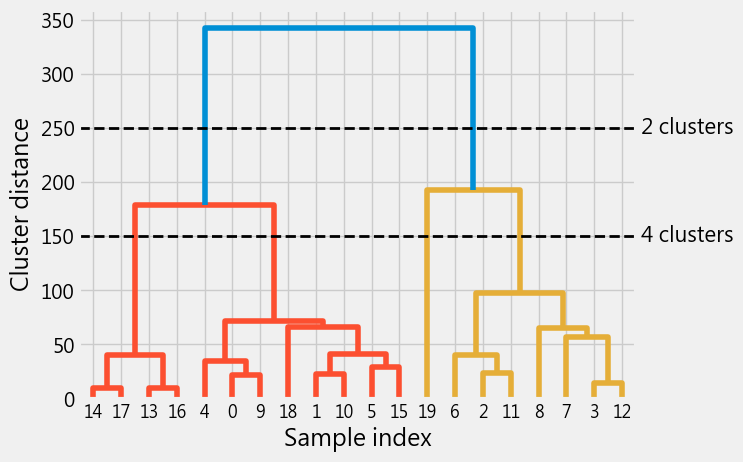

In [20]:
from scipy.cluster import hierarchy

# 取出前 20 隻寶可夢的特徵值
X = df_X.loc[:, 'HP':'Speed']

# 進行階層式分群
model = hierarchy.linkage(X, 'ward')

# 繪製樹狀圖
hierarchy.dendrogram(
    model, 
    orientation="top", 
    labels=df_X.index
)
plt.xlabel("Sample index")
plt.ylabel('Cluster distance')

# 標示橫切線
ax = plt.gca()

# 取得 x 軸的範圍 (上下限)
bounds = ax.get_xbound()
'''
bounds[0] = 0.0
bounds[1] = 200.0
'''

# 繪製橫切線
ax.plot(bounds, [250, 250], '--', c='k', lw=2)
ax.text(
    bounds[1], # x = 200 的位置
    250, # y = 250 的位置
    ' 2 clusters', # 文字
    va='center', # 垂直對齊方式
    fontdict={'size':15} # 字型大小
)

# 繪製橫切線
ax.plot(bounds, [150, 150], '--', c='k', lw=2)
ax.text(
    bounds[1], # x = 200 的位置
    150, # y = 150 的位置
    ' 4 clusters', # 文字
    va='center', # 垂直對齊方式
    fontdict={'size':15} # 字型大小
)

plt.show()

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 分群
- DBSCAN 是一種基於密度的聚類算法，它可以將具有足夠高密度的區域劃分為獨立的群集。
- DBSCAN 的主要思想是找到密度可達的點，並將它們劃分為一個群集。對於那些位於群集之間的點，它們被視為噪音點。
- DBSCAN 有兩個重要的參數：ε (eps) 和 minPts (也可以看成 min_samples)。
    - ε (eps) 是一個半徑參數，用來確定一個點的 ε-鄰域。
    - minPts 是一個密度參數，用來確定一個核心點的最小數量。
- DBSCAN 將資料點分為三類：核心點 (core points)、邊界點 (border points) 和噪音點 (noise points)。
    - 核心點：如果一個點的 ε-鄰域內至少包含 minPts 個點，則該點是一個核心點。
    - 邊界點：如果一個點的 ε-鄰域內包含少於 minPts 個點，但它是一個核心點的 ε-鄰域內的點，則該點是一個邊界點。
    - 噪音點：如果一個點的 ε-鄰域內包含少於 minPts 個點，並且它也不是任何核心點的 ε-鄰域內的點，則該點是一個噪音點。
- 簡單概念：
  - 若一個樣本點在指定的半徑內包括至少 min_samples 個相鄰樣本，則該點被稱為核心樣本 (核心點，core point)。
  - 若一個樣本點位於核心點的半徑內，但它的半徑內包含少於 min_samples 個相鄰樣本，則稱該點為邊界樣本 (邊界點，border point)。
  - 若一個樣本點不是核心點，也不是邊界點，則稱該點為噪音樣本 (噪音/雜訊點，noise point)。
- 優點是可以處理任意形狀的群集，並且可以檢測和去除噪音點。
- 缺點是對參數 ε (eps) 和 minPts 敏感，並且對高維數據的效果不好。


![](https://miro.medium.com/v2/resize:fit:1350/0*o_BoNtBbwvAiNFLB.gif)

![](https://miro.medium.com/v2/resize:fit:1280/1*-eCxHTeWqaKdS-nvOSCjfQ.gif)

![](https://vexceldata.com/wp-content/uploads/2022/01/DBSCAN_tutorial.gif)

在使用 DBSCAN（Density-Based Spatial Clustering of Applications with Noise）分群法之前，通常建議對資料進行標準化，但並非絕對必要。是否需要標準化主要取決於以下幾個因素：
- **資料的尺度差異**：如果資料的不同特徵具有不同的尺度（例如，某些特徵的數值範圍較大，而其他特徵的範圍較小），這會影響到距離的計算。DBSCAN 使用距離來判斷點之間的密度，如果某些特徵的數值範圍大，則這些特徵可能會在計算距離時佔更大比重，影響分群效果。因此，若資料存在明顯的尺度差異，建議先標準化。
- **資料的單位**：如果特徵的單位不同，例如距離（公里）和時間（小時），也會影響距離的計算，導致某些特徵在分群過程中佔據主導地位。標準化可以消除單位的影響，使得不同單位的特徵在分群中更公平地參與。
- **噪音點的識別**：DBSCAN 的一個特點是能夠識別出噪音點（outliers），而標準化可以使得這些噪音點更容易被區分出來，減少特徵尺度差異對噪音點判斷的影響。

因此，通常情況下建議進行標準化，特別是在資料特徵範圍相差較大或存在不同單位時。

In [83]:
from sklearn.cluster import DBSCAN

# 取出前 100 隻寶可夢進行分群
X = df.loc[df.index < 100, 'HP':'Speed']

# # 標準化
# scaler = StandardScaler()
# scaler = scaler.fit(X)
# X = scaler.transform(X)
# X = pd.DataFrame(
#     X, 
#     columns=['HP', 'Attack', 'Defense', 'SpecialAtk', 'SpecialDef', 'Speed']
# )

# 初始化 DBSCAN
clf = DBSCAN(eps=35, min_samples=3)

# 進行分群
clf = clf.fit(X)

# 取出分群結果
clf.labels_

# 不重複的分群標籤
'''
-1 代表離群值 (outlier)
0 代表第 1 群，依此類推。
'''
set(clf.labels_)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

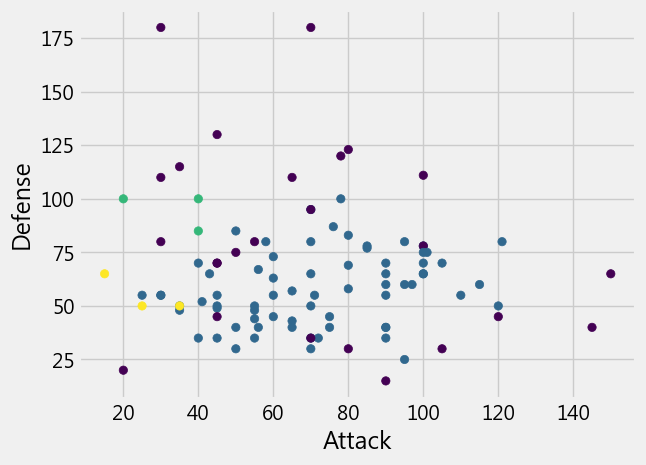

In [86]:
# 繪製 DBSCAN 分群結果
plt.scatter(
    X['Speed'], 
    X['Defense'], 
    c=clf.labels_, 
    cmap='viridis'
)

# # 在樣本點上標示分群標籤
# for i, label in enumerate(clf.labels_):
#     plt.annotate(label, (X['Speed'][i], X['Defense'][i]))

plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

In [85]:
pd.Series(clf.labels_).value_counts()

 0    69
-1    25
 1     3
 2     3
Name: count, dtype: int64